In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
Note: you may need to restart the kernel to use updated packages.


## This Notebook is for the research question 1: Predict whether the offer holders decide to enroll at the school
### 0. Import the library and read the dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime
import imblearn
from sklearn.preprocessing import scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
pd.set_option('display.max_columns', 300) # allow us read the full picture of dataframe
pd.set_option('display.max_rows', 300) # allow us read the full picture of dataframe

In [2]:
data = pd.read_pickle("df/offer_holder.pkl") 

data.head()

,Department,Applicant ID,City - Address line 4,Programme,Latest Decision,Latest Decision Date,Country of Birth,Domicile,Nationality,Country of Institution,Grade on application,uob_alum,home_oversea,master_prev,distance,Institution,Institution_app_num,Fee Status,School,A1 Created date,A1 Updated date,A2 Created date,Decision Date,Response Date,Days at Admissions Review,Days in School,Days at Decision Stage,Total Days Admissions,TOTAL Days,Response days,decision_since_Sep01,A1C_since_Sep01,A1U_since_Sep01,A2C_since_Sep01,Response_since_Sep01,funding,Decision_C,Decision_R,Decision_U,Status,Qual_Name,Ielts_Overall,Ielts_Listening,Ielts_Reading,Ielts_Writing,Ielts_Speaking,Toefl_Overall,Toefl_Listening,Toefl_Reading,Toefl_Writing,Toefl_Speaking,PTE_Overall,PTE_Listening,PTE_Reading,PTE_Writing,PTE_Speaking,eng_type,multi_app,Prog Code,Prog Desc,Date Started,offered,offer_num,accepted,Institution_offer_num,Insti_weight
0,COMPUTER SCI,2305538,BENGALURU,MSc Computer Science FT,Conditional Offer - waiting for response,2021-02-25,NaN,NaN,NaN,IndiaIndia,8.4,0,1,0,8000.0,PES University,12.0,O,Computer Science,2020-11-30,2021-01-28,2021-02-05,2021-02-25,NaT,59.0,8.0,20.0,79.0,87.0,0.0,177.0,90.0,149.0,157.0,0.0,0.0,1.0,0.0,0.0,Active,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NaN,NaN,NaN,1,1.0,0,9.0,0.750000
1,BUSINESS,2376697,KHAJRANA INDORE,MSc Adv Eng Man (Constr Man)FT,Conditional Offer - waiting for response,2021-06-10,India,India,India,IndiaIndia,7.42 CGPA,0,1,0,8000.0,ACROPOLIS INSTITUTE OF TECHNOLOGY & RESEARCH,1.0,O,Business School,2021-05-24,2021-06-10,2021-02-05,2021-06-10,NaT,17.0,0.0,0.0,17.0,17.0,0.0,282.0,265.0,282.0,0.0,0.0,0.0,1.0,0.0,0.0,Active,IELTS (International English Language Testing ...,8.0,8.0,9.0,6.5,7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,NaN,NaN,NaN,1,1.0,0,1.0,1.000000
3,EEC ENG,2263436,CHANGCHUN CITY,MSc Elec + Computer Eng FT,Withdrawn,2020-11-06,China,China,China,China,79.13%,0,1,0,8000.0,Guizhou University,5.0,O,Elec Elec and System Eng;Elec Elec and Sys Eng...,2020-10-06,2020-11-06,2021-02-05,2020-11-06,2006-11-20,31.0,0.0,0.0,31.0,31.0,0.0,66.0,35.0,66.0,0.0,66.0,0.0,1.0,0.0,0.0,Withdrawn,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NaN,NaN,NaN,1,1.0,0,5.0,1.000000
4,COMPUTER SCI,2295129,"WEIHAI, SHANDONG",MSc Artific Int & Mach Lear FT,Conditional Offer - waiting for response,2021-03-18,China,China,China,ChinaChina,,0,1,0,8000.0,Shandong University,9.0,O,Computer Science,2020-11-16,2021-02-15,2021-02-15,2021-03-18,2006-11-20,91.0,0.0,31.0,122.0,122.0,0.0,198.0,76.0,167.0,167.0,0.0,0.0,1.0,0.0,0.0,Active,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2,NaN,NaN,NaN,1,2.0,0,4.0,0.444444
5,COMPUTER SCI,2295129,"WEIHAI, SHANDONG",MSc Computer Science FT,Withdrawn,NaT,China,China,China,ChinaChina,,0,1,0,8000.0,Shandong University,9.0,O,Computer Science,2020-11-16,2021-01-27,2021-02-17,2021-03-18,2006-11-20,72.0,21.0,29.0,101.0,122.0,0.0,0.0,76.0,148.0,169.0,0.0,0.0,1.0,0.0,0.0,Withdrawn,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2,NaN,NaN,NaN,1,2.0,0,4.0,0.444444


## 1. Check the dataframe

In [3]:
data.columns

Index(['Department', 'Applicant ID', 'City - Address line 4', 'Programme',
       'Latest Decision', 'Latest Decision Date', 'Country of Birth',
       'Domicile', 'Nationality', 'Country of Institution',
       'Grade on application', 'uob_alum', 'home_oversea', 'master_prev',
       'distance', 'Institution', 'Institution_app_num', 'Fee Status',
       'School', 'A1 Created date', 'A1 Updated date', 'A2 Created date',
       'Decision Date', 'Response Date', 'Days at Admissions Review',
       'Days in School', 'Days at Decision Stage', 'Total Days Admissions',
       'TOTAL Days', 'Response days', 'decision_since_Sep01',
       'A1C_since_Sep01', 'A1U_since_Sep01', 'A2C_since_Sep01',
       'Response_since_Sep01', 'funding', 'Decision_C', 'Decision_R',
       'Decision_U', 'Status', 'Qual_Name', 'Ielts_Overall', 'Ielts_Listening',
       'Ielts_Reading', 'Ielts_Writing', 'Ielts_Speaking', 'Toefl_Overall',
       'Toefl_Listening', 'Toefl_Reading', 'Toefl_Writing', 'Toefl_Speaking',


In [4]:
# Define the feature set (X) and target variable (Y)
X_all = data.copy()

X_all['accepted'] = X_all['accepted'].astype('category')

X = X_all.loc[:,['School',  'Programme',
                 'uob_alum', 'home_oversea', 'master_prev', 'distance', 'funding',                  
                 'Days at Admissions Review', 'Days in School', 'Days at Decision Stage', 'Total Days Admissions', 'TOTAL Days', 'Response days', 
                 'decision_since_Sep01', 'A1C_since_Sep01', 'A1U_since_Sep01', 'A2C_since_Sep01', 'Response_since_Sep01',                  
                 'Decision_C', 'Decision_R', 'Decision_U', 
                 'eng_type', 'Ielts_Overall', 'Ielts_Listening', 'Ielts_Reading', 'Ielts_Writing', 'Ielts_Speaking', 
                 'Toefl_Overall', 'Toefl_Listening', 'Toefl_Reading', 'Toefl_Writing', 'Toefl_Speaking', 
                 'PTE_Overall', 'PTE_Listening', 'PTE_Reading', 'PTE_Writing', 'PTE_Speaking', 
                 'Institution_app_num',  'Institution_offer_num', 'Insti_weight',
                 'multi_app', 'offer_num']].copy()

X = X.fillna(method="ffill")
Y = X_all['accepted']

In [5]:
Y.describe()

count     8912
unique       2
top          0
freq      7584
Name: accepted, dtype: int64

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8912 entries, 0 to 15602
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   School                     8912 non-null   object 
 1   Programme                  8912 non-null   object 
 2   uob_alum                   8912 non-null   int32  
 3   home_oversea               8912 non-null   int32  
 4   master_prev                8912 non-null   int64  
 5   distance                   8912 non-null   float64
 6   funding                    8912 non-null   float64
 7   Days at Admissions Review  8912 non-null   float64
 8   Days in School             8912 non-null   float64
 9   Days at Decision Stage     8912 non-null   float64
 10  Total Days Admissions      8912 non-null   float64
 11  TOTAL Days                 8912 non-null   float64
 12  Response days              8912 non-null   float64
 13  decision_since_Sep01       8912 non-null   floa

## 2.Process the object type column
Here we have the 'School' and 'Programme' columns

### 2.1 'School' column
Use one hot encoder to create a binary column for each category

In [7]:
X['School'].nunique()

12

In [8]:
X['School'].unique()

array(['Computer Science', 'Business School',
       'Elec Elec and System Eng;Elec Elec and Sys Engineering',
       'Metallurgy and Materials', 'Civil Engineering',
       'School of Engineering;Elec Elec and Sys Engineering',
       'Mechanical Engineering', 'Physics and Astronomy',
       'Chemical Engineering', 'Mathematics', 'Wiley', 'EPS College Hub'],
      dtype=object)

In [9]:
ohe = OneHotEncoder(sparse=False)
X[['Computer Science', 'Business School',
       'Elec Elec and System Eng;Elec Elec and Sys Engineering',
       'Metallurgy and Materials', 'Civil Engineering',
       'School of Engineering;Elec Elec and Sys Engineering',
       'Mechanical Engineering', 'Physics and Astronomy',
       'Chemical Engineering', 'Mathematics', 'Wiley', 'EPS College Hub']] = ohe.fit_transform(X['School'].values.reshape(-1,1))
print(ohe.get_feature_names_out(['School']))
X = X.drop(['School'], axis=1)

['School_Business School' 'School_Chemical Engineering'
 'School_Civil Engineering' 'School_Computer Science'
 'School_EPS College Hub'
 'School_Elec Elec and System Eng;Elec Elec and Sys Engineering'
 'School_Mathematics' 'School_Mechanical Engineering'
 'School_Metallurgy and Materials' 'School_Physics and Astronomy'
 'School_School of Engineering;Elec Elec and Sys Engineering'
 'School_Wiley']


### 2.2 'Programme' column

In [10]:
X['Programme'].nunique()

101

In [11]:
X['Programme'].unique()

array(['MSc Computer Science FT', 'MSc Adv Eng Man (Constr Man)FT',
       'MSc Elec + Computer Eng FT', 'MSc Artific Int & Mach Lear FT',
       'MSc Human-Computer Interact FT', 'MSc Data Science FT',
       'MSc Material Sci + Engineer FT', 'MSc Adv Eng Man (Projec Man)FT',
       'MSc Structural Engineering (FT)', 'MSc Electric Power Systems FT',
       'MSc Rail Sys Eng+Int w Pre FT', 'MSc Adv Eng Man (Generalist)FT',
       'MSc Communications Engineer FT', 'MSc Advanced Mech Eng FT',
       'MSc Phys + Tech Nuc React FT', 'MSc Civil Engineering PT Dubai',
       'MSc Civil Engineering FT', 'MSc Advanced Chemical Eng FT',
       'MSc Cyber Security FT', 'MSc Advanced Computer Sc FT',
       'MSc Global Energy Technologies and Systems FT',
       'MEng Comp Sci Sof En FT (Dub)', 'BSc Computer Sci FT (Dubai)',
       'MSc Applied Mathematics FT', 'MSc MORSE FT', 'MSc Robotics FT',
       'MSc Art Int + Comp Sc PT (Dub)', 'MSc Nuclear Decom Waste Man FT',
       'PGCert Des Lear Env

### We will apply three methods to deal with this column
1. drop this column. In the future study, the dataset can be split by programme and build different models for different programmes
2. use Ordinal Encoder to encode target labels with value between 0 and n_classes-1. Output: 1 column
3. Use One Hot Encoder. Output: n_classes columns. The dimension increase may affect a lot

#### 1.Drop the 'programme', the new feature set named X1

In [12]:
X1 = X.copy()
X1 = X1.drop(['Programme'], axis=1)

#### 2.Ordinal Encoder on the 'programme', the new feature set named X2

In [13]:
X2 = X.copy()
enc = OrdinalEncoder()
X2['Programme'] = enc.fit_transform(X2['Programme'].values.reshape(-1,1))

In [14]:
X2['Programme'].nunique()

101

#### 3.One Hot Encoder on the 'programme', the new feature set named X3

In [15]:
ohe = OneHotEncoder(sparse=False)
X3 = X.copy()
X3[['MSc Computer Science FT', 'MSc Adv Eng Man (Constr Man)FT',
       'MSc Elec + Computer Eng FT', 'MSc Artific Int & Mach Lear FT',
       'MSc Human-Computer Interact FT', 'MSc Data Science FT',
       'MSc Material Sci + Engineer FT', 'MSc Adv Eng Man (Projec Man)FT',
       'MSc Structural Engineering (FT)', 'MSc Electric Power Systems FT',
       'MSc Rail Sys Eng+Int w Pre FT', 'MSc Adv Eng Man (Generalist)FT',
       'MSc Communications Engineer FT', 'MSc Advanced Mech Eng FT',
       'MSc Phys + Tech Nuc React FT', 'MSc Civil Engineering PT Dubai',
       'MSc Civil Engineering FT', 'MSc Advanced Chemical Eng FT',
       'MSc Cyber Security FT', 'MSc Advanced Computer Sc FT',
       'MSc Global Energy Technologies and Systems FT',
       'MEng Comp Sci Sof En FT (Dub)', 'BSc Computer Sci FT (Dubai)',
       'MSc Applied Mathematics FT', 'MSc MORSE FT', 'MSc Robotics FT',
       'MSc Art Int + Comp Sc PT (Dub)', 'MSc Nuclear Decom Waste Man FT',
       'PGCert Des Lear Env DL PT', 'BIA Engin Phys Sci 4Yr (Dubai)',
       'BSc Art Intel and Comp Sci FT Dubai',
       'MSc Adv Eng Man (Operat Man)FT',
       'MSc Advanced Chemical Engineering with Energy FT',
       'MSc Art Int + Comp Sc FT (Dub)',
       'BIA Engineering Physical Sciences 43m Jan Dubai',
       'MSc Geotechnical Eng FT', 'MSc Civ Eng and Management FT',
       'MSc Computer Science PT (Dub)', 'MSc Geotechnical Eng + Mgt FT',
       'MSc Industrial Project Man. PT Blended Learning',
       'MSc Advanced Chemical Eng with Bioprocessing FT',
       'MSc Food Safety; Hyg + Man FT', 'MSc Financial Engineering FT',
       'MSc Formulation Engineering FT', 'MSc Elec Pow Syst w Adv Res FT',
       'MSc Computer Science FT(Dubai)', 'MSc Road Mgt + Eng FT',
       'MSc Fue Cel + Hyd Tec Blend FT', 'MSc Adv Chem Eng w Form FT',
       'PGDip Adv Chem Eng with Healthcare Technology FT',
       'BEng Mechanical Eng FT (Dubai)', 'MSc Rail Sys Eng + Int PT DA',
       'MSc Civ Eng and Management PT', 'MSc Healthcare Technology FT',
       'MSc Structural Engineering PT', 'MSc Rail Safe + Control Sys FT',
       'MSc Rail Saf+Con Sys (Flex) DL', 'MSc Rail System Engin Integ DL',
       'MSc Adv Eng Man (System Man)FT',
       'MSc Civil Engineering Dubai (January) PT',
       'MSc Advanced Mech Eng PT', 'MSc Civil Engineering PT',
       'MSc Mathematical Finance FT', 'MSc Rail Sys Eng Inte DL Fixed',
       'MSc Rail Systems Engin Int FT', 'MSc Civil Engineering FT Dubai',
       'PGDip Art In + Com Sc FT (Dub)', 'PGDip Computer Scien FT(Dubai)',
       'MSc Civil Engineering Part Time Fixed Duration',
       'MSc Advanced Chemical Eng PT', 'MSc Adv Eng Man (Projec Man)PT',
       'MSc Road Mgt + Eng PT', 'PGDip Rail Safe + Cont Sys FT',
       'MSc Rail Saf+Con Sys DL Fixed', 'MSc Geotechnical Eng PT',
       'MSc Adv Eng Man (Constr Man)PT', 'MSc Food Safety, Hyg + Man PT',
       'MSc Phys + Tech Nuc React PT', 'PGCert Rail Sa+Co Sy (Flex) DL',
       'MSc Advanced Chemical Engineering with Form PT',
       'MSc Adv Eng Man (Generalist)PT', 'MSc Fue Cel + Hyd Tec Blend PT',
       'MSc Adv Chem Eng with Healthcare Technology FT',
       'MSc Rail Safe+Cont Sy w Pre FT', 'PGCert Rail Syst Eng Integ DL',
       'PGCert Rail Systems Eng Int FT', 'MSc Civil Enginee FT Jan Dubai',
       'MSc Adv Eng Man (Operat Man)PT', 'PGDip Civ Eng & Management FT',
       'PGDip Road Mgt + Eng FT',
       'MSc Geotechnical Engineering (PT; Fixed Duration)',
       'PG MC Fuel Cell + Hyd Tech MC', 'MSc Communications Engineer PT',
       'MSc Nuclear Decom Waste Man PT', 'PGDip Healthcare Technology FT',
       'MSc Electric Power Systems PT', 'PGDip Rail Systems Eng Int FT',
       'MSc Elec + Computer Eng PT', 'PGDip Civil Eng  FT (Dubai)',
       'PGDip Art In + Com Sc PT (Dub)', 'PGDip Advanced Chemical Eng FT']] = ohe.fit_transform(X3['Programme'].values.reshape(-1,1))

X3 = X3.drop(['Programme'], axis=1)

In [16]:
X1.shape

(8912, 52)

In [17]:
X2.shape

(8912, 53)

In [18]:
X3.shape

(8912, 153)

## 3.Normalization
Now we have X1 X2 X3 three dataframes. Every method in the following process would be applied on all these 3 dataframes. First is normalization

In [21]:
from sklearn.preprocessing import MinMaxScaler
X1_normalized = X1.copy()
scaler1 = MinMaxScaler() 
scaled_values = scaler1.fit_transform(X1) 
X1_normalized.loc[:,:] = scaled_values
X1_normalized.to_pickle("X1/X1_normalized.pkl") 
X1_normalized.describe()

,uob_alum,home_oversea,master_prev,distance,funding,Days at Admissions Review,Days in School,Days at Decision Stage,Total Days Admissions,TOTAL Days,Response days,decision_since_Sep01,A1C_since_Sep01,A1U_since_Sep01,A2C_since_Sep01,Response_since_Sep01,Decision_C,Decision_R,Decision_U,eng_type,Ielts_Overall,Ielts_Listening,Ielts_Reading,Ielts_Writing,Ielts_Speaking,Toefl_Overall,Toefl_Listening,Toefl_Reading,Toefl_Writing,Toefl_Speaking,PTE_Overall,PTE_Listening,PTE_Reading,PTE_Writing,PTE_Speaking,Institution_app_num,Institution_offer_num,Insti_weight,multi_app,offer_num,Computer Science,Business School,Elec Elec and System Eng;Elec Elec and Sys Engineering,Metallurgy and Materials,Civil Engineering,School of Engineering;Elec Elec and Sys Engineering,Mechanical Engineering,Physics and Astronomy,Chemical Engineering,Mathematics,Wiley,EPS College Hub
count,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000
mean,0.010099,0.924372,0.057787,0.443908,0.033214,0.061153,0.020221,0.052169,0.079333,0.091537,0.026635,0.312395,0.185834,0.254126,0.194986,0.162295,0.953770,0.007855,0.038375,0.161355,0.022833,0.035028,0.034763,0.028641,0.029535,0.024027,0.010261,0.010739,0.009612,0.009288,0.002093,0.002225,0.002007,0.002142,0.002136,0.136725,0.111134,0.721747,0.037029,0.028725,0.109964,0.089879,0.108618,0.348294,0.023900,0.105364,0.061490,0.041854,0.042864,0.014699,0.046791,0.006284
std,0.099989,0.264417,0.233354,0.120211,0.179204,0.053233,0.042268,0.055086,0.059757,0.066538,0.076858,0.139929,0.145178,0.157775,0.188857,0.197542,0.209994,0.088282,0.192111,0.201174,0.045548,0.054960,0.054863,0.045626,0.046485,0.108454,0.048220,0.050130,0.045253,0.043789,0.041229,0.043016,0.038854,0.041420,0.041501,0.185772,0.160715,0.224381,0.108760,0.094689,0.312863,0.286024,0.311176,0.476457,0.152747,0.307039,0.240241,0.200266,0.202561,0.120353,0.211202,0.079025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.476992,0.000000,0.014805,0.000000,0.000000,0.029451,0.035857,0.000000,0.224615,0.076692,0.132331,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008547,0.010753,0.565089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.476992,0.000000,0.055182,0.004184,0.045283,0.072289,0.086321,0.000000,0.326154,0.145865,0.255639,0.179054,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068376,0.053763,0.702918,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.476992,0.000000,0.103634,0.027720,0.090566,0.121821,0.136786,0.009050,0.409231,0.278195,0.360902,0.344595,0.332838

In [22]:
from sklearn.preprocessing import MinMaxScaler
X2_normalized = X2.copy()
scaler2 = MinMaxScaler() 
scaled_values = scaler2.fit_transform(X2) 
X2_normalized.loc[:,:] = scaled_values
X2_normalized.to_pickle("X2/X2_normalized.pkl") 
X2_normalized.describe()

,Programme,uob_alum,home_oversea,master_prev,distance,funding,Days at Admissions Review,Days in School,Days at Decision Stage,Total Days Admissions,TOTAL Days,Response days,decision_since_Sep01,A1C_since_Sep01,A1U_since_Sep01,A2C_since_Sep01,Response_since_Sep01,Decision_C,Decision_R,Decision_U,eng_type,Ielts_Overall,Ielts_Listening,Ielts_Reading,Ielts_Writing,Ielts_Speaking,Toefl_Overall,Toefl_Listening,Toefl_Reading,Toefl_Writing,Toefl_Speaking,PTE_Overall,PTE_Listening,PTE_Reading,PTE_Writing,PTE_Speaking,Institution_app_num,Institution_offer_num,Insti_weight,multi_app,offer_num,Computer Science,Business School,Elec Elec and System Eng;Elec Elec and Sys Engineering,Metallurgy and Materials,Civil Engineering,School of Engineering;Elec Elec and Sys Engineering,Mechanical Engineering,Physics and Astronomy,Chemical Engineering,Mathematics,Wiley,EPS College Hub
count,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000
mean,0.389613,0.010099,0.924372,0.057787,0.443908,0.033214,0.061153,0.020221,0.052169,0.079333,0.091537,0.026635,0.312395,0.185834,0.254126,0.194986,0.162295,0.953770,0.007855,0.038375,0.161355,0.022833,0.035028,0.034763,0.028641,0.029535,0.024027,0.010261,0.010739,0.009612,0.009288,0.002093,0.002225,0.002007,0.002142,0.002136,0.136725,0.111134,0.721747,0.037029,0.028725,0.109964,0.089879,0.108618,0.348294,0.023900,0.105364,0.061490,0.041854,0.042864,0.014699,0.046791,0.006284
std,0.208625,0.099989,0.264417,0.233354,0.120211,0.179204,0.053233,0.042268,0.055086,0.059757,0.066538,0.076858,0.139929,0.145178,0.157775,0.188857,0.197542,0.209994,0.088282,0.192111,0.201174,0.045548,0.054960,0.054863,0.045626,0.046485,0.108454,0.048220,0.050130,0.045253,0.043789,0.041229,0.043016,0.038854,0.041420,0.041501,0.185772,0.160715,0.224381,0.108760,0.094689,0.312863,0.286024,0.311176,0.476457,0.152747,0.307039,0.240241,0.200266,0.202561,0.120353,0.211202,0.079025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.230000,0.000000,1.000000,0.000000,0.476992,0.000000,0.014805,0.000000,0.000000,0.029451,0.035857,0.000000,0.224615,0.076692,0.132331,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008547,0.010753,0.565089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.400000,0.000000,1.000000,0.000000,0.476992,0.000000,0.055182,0.004184,0.045283,0.072289,0.086321,0.000000,0.326154,0.145865,0.255639,0.179054,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068376,0.053763,0.702918,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.000000,1.000000,0.000000,0.476992,0.000000,0.103634,0.027720,0.09

In [23]:
from sklearn.preprocessing import MinMaxScaler
X3_normalized = X3.copy()
scaler3 = MinMaxScaler() 
scaled_values = scaler3.fit_transform(X3) 
X3_normalized.loc[:,:] = scaled_values
X3_normalized.to_pickle("X3/X3_normalized.pkl") 
X3_normalized.describe()

,uob_alum,home_oversea,master_prev,distance,funding,Days at Admissions Review,Days in School,Days at Decision Stage,Total Days Admissions,TOTAL Days,Response days,decision_since_Sep01,A1C_since_Sep01,A1U_since_Sep01,A2C_since_Sep01,Response_since_Sep01,Decision_C,Decision_R,Decision_U,eng_type,Ielts_Overall,Ielts_Listening,Ielts_Reading,Ielts_Writing,Ielts_Speaking,Toefl_Overall,Toefl_Listening,Toefl_Reading,Toefl_Writing,Toefl_Speaking,PTE_Overall,PTE_Listening,PTE_Reading,PTE_Writing,PTE_Speaking,Institution_app_num,Institution_offer_num,Insti_weight,multi_app,offer_num,Computer Science,Business School,Elec Elec and System Eng;Elec Elec and Sys Engineering,Metallurgy and Materials,Civil Engineering,School of Engineering;Elec Elec and Sys Engineering,Mechanical Engineering,Physics and Astronomy,Chemical Engineering,Mathematics,Wiley,EPS College Hub,MSc Computer Science FT,MSc Adv Eng Man (Constr Man)FT,MSc Elec + Computer Eng FT,MSc Artific Int & Mach Lear FT,MSc Human-Computer Interact FT,MSc Data Science FT,MSc Material Sci + Engineer FT,MSc Adv Eng Man (Projec Man)FT,MSc Structural Engineering (FT),MSc Electric Power Systems FT,MSc Rail Sys Eng+Int w Pre FT,MSc Adv Eng Man (Generalist)FT,MSc Communications Engineer FT,MSc Advanced Mech Eng FT,MSc Phys + Tech Nuc React FT,MSc Civil Engineering PT Dubai,MSc Civil Engineering FT,MSc Advanced Chemical Eng FT,MSc Cyber Security FT,MSc Advanced Computer Sc FT,MSc Global Energy Technologies and Systems FT,MEng Comp Sci Sof En FT (Dub),BSc Computer Sci FT (Dubai),MSc Applied Mathematics FT,MSc MORSE FT,MSc Robotics FT,MSc Art Int + Comp Sc PT (Dub),MSc Nuclear Decom Waste Man FT,PGCert Des Lear Env DL PT,BIA Engin Phys Sci 4Yr (Dubai),BSc Art Intel and Comp Sci FT Dubai,MSc Adv Eng Man (Operat Man)FT,MSc Advanced Chemical Engineering with Energy FT,MSc Art Int + Comp Sc FT (Dub),BIA Engineering Physical Sciences 43m Jan Dubai,MSc Geotechnical Eng FT,MSc Civ Eng and Management FT,MSc Computer Science PT (Dub),MSc Geotechnical Eng + Mgt FT,MSc Industrial Project Man. PT Blended Learning,MSc Advanced Chemical Eng with Bioprocessing FT,MSc Food Safety; Hyg + Man FT,MSc Financial Engineering FT,MSc Formulation Engineering FT,MSc Elec Pow Syst w Adv Res FT,MSc Computer Science FT(Dubai),MSc Road Mgt + Eng FT,MSc Fue Cel + Hyd Tec Blend FT,MSc Adv Chem Eng w Form FT,PGDip Adv Chem Eng with Healthcare Technology FT,BEng Mechanical Eng FT (Dubai),MSc Rail Sys Eng + Int PT DA,MSc Civ Eng and Management PT,MSc Healthcare Technology FT,MSc Structural Engineering PT,MSc Rail Safe + Control Sys FT,MSc Rail Saf+Con Sys (Flex) DL,MSc Rail System Engin Integ DL,MSc Adv Eng Man (System Man)FT,MSc Civil Engineering Dubai (January) PT,MSc Advanced Mech Eng PT,MSc Civil Engineering PT,MSc Mathematical Finance FT,MSc Rail Sys Eng Inte DL Fixed,MSc Rail Systems Engin Int FT,MSc Civil Engineering FT Dubai,PGDip Art In + Com Sc FT (Dub),PGDip Computer Scien FT(Dubai),MSc Civil Engineering Part Time Fixed Duration,MSc Advanced Chemical Eng PT,MSc Adv Eng Man (Projec Man)PT,MSc Road Mgt + Eng PT,PGDip Rail Safe + Cont Sys FT,MSc Rail Saf+Con Sys DL Fixed,MSc Geotechnical Eng PT,MSc Adv Eng Man (Constr Man)PT,"MSc Food Safety, Hyg + Man PT",MSc Phys + Tech Nuc React PT,PGCert Rail Sa+Co Sy (Flex) DL,MSc Advanced Chemical Engineering with Form PT,MSc Adv Eng Man (Generalist)PT,MSc Fue Cel + Hyd Tec Blend PT,MSc Adv Chem Eng with Healthcare Technology FT,MSc Rail Safe+Cont Sy w Pre FT,PGCert Rail Syst Eng Integ DL,PGCert Rail Systems Eng Int FT,MSc Civil Enginee FT Jan Dubai,MSc Adv Eng Man (Operat Man)PT,PGDip Civ Eng & Management FT,PGDip Road Mgt + Eng FT,MSc Geotechnical Engineering (PT; Fixed Duration),PG MC Fuel Cell + Hyd Tech MC,MSc Communications Engineer PT,MSc Nuclear Decom Waste Man PT,PGDip Healthcare Technology FT,MSc Electric Power Systems PT,PGDip Rail Systems Eng Int FT,MSc Elec + Computer Eng PT,PGDip Civil Eng FT (Dubai),PGDip Art In + Com Sc PT (Dub),PGDip Advanced Chemical Eng FT
count,891

For the convenience of adapting the other new data to test the model, save the scalers

In [24]:
import joblib
joblib.dump(scaler1, 'scaler1.gz')
joblib.dump(scaler2, 'scaler2.gz')
joblib.dump(scaler3, 'scaler3.gz')

['scaler3.gz']

pandas.core.frame.DataFrame

## 4.Feature selection

### 1)PCA to see how the datasets distribute in the dimensions

In [44]:
from sklearn.decomposition import PCA
pca = PCA()
pca_fit = pca.fit(X1_normalized)

print('Explained Variance Ratio (%):')
print(pca.explained_variance_ratio_*100)
print('Singular Values:')
print(pca.singular_values_)

Explained Variance Ratio (%):
[1.77187296e+01 9.66079862e+00 7.43912649e+00 7.25920631e+00
 6.66026599e+00 5.15904591e+00 4.71696568e+00 3.96843530e+00
 3.74383623e+00 3.51390278e+00 3.31298051e+00 3.13145562e+00
 2.95567974e+00 2.86300194e+00 2.45167562e+00 2.34994305e+00
 2.13922131e+00 1.79851481e+00 1.63343467e+00 1.36135310e+00
 1.14236580e+00 9.63986144e-01 6.99432487e-01 6.45205965e-01
 5.94488604e-01 5.19821646e-01 4.50419366e-01 2.69189476e-01
 2.55238423e-01 1.49268952e-01 1.24722572e-01 1.02137590e-01
 7.85326887e-02 6.04083031e-02 3.60664438e-02 2.68105560e-02
 2.42605729e-02 5.30221386e-03 3.34842270e-03 2.43969150e-03
 2.08678056e-03 1.99770662e-03 1.50468699e-03 1.41647169e-03
 9.31404557e-04 5.09238512e-04 2.96484583e-04 2.38080671e-04
 6.07327512e-30 9.23306472e-31 8.97406906e-32 7.30233886e-32]
Singular Values:
[4.81804894e+01 3.55763535e+01 3.12187773e+01 3.08389432e+01
 2.95393344e+01 2.59979805e+01 2.48591501e+01 2.28015605e+01
 2.21469201e+01 2.14560508e+01 2.0833

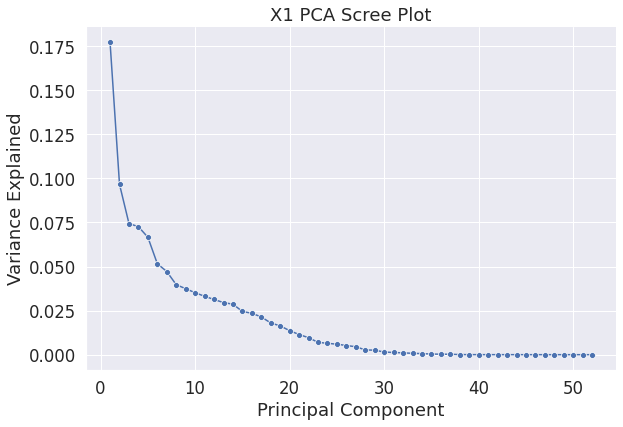

In [45]:
sns.set(font_scale=1.5)
PC_values1 = np.arange(pca.n_components_) + 1
ax1 = sns.relplot(x=PC_values1, y= pca.explained_variance_ratio_, marker='o', kind="line", height=6, aspect=1.5)
ax1.set(xlabel='Principal Component',ylabel = 'Variance Explained', title='X1 PCA Scree Plot' )
ax1.figure.savefig("X1/X1PCA.png")

In [46]:
# print the factors ranking in the order of Eigenvector 
factors = pd.DataFrame({'Factors': X1_normalized.columns, 'Eigenvector 1': pca.components_[0]})
factors = factors.sort_values(by=['Eigenvector 1'], ascending=False)
print(factors)

                                              Factors  Eigenvector 1
43                           Metallurgy and Materials       0.925098
14                                    A2C_since_Sep01       0.087441
19                                           eng_type       0.033080
18                                         Decision_U       0.027776
11                               decision_since_Sep01       0.018772
25                                      Toefl_Overall       0.018116
2                                         master_prev       0.014712
12                                    A1C_since_Sep01       0.012940
15                               Response_since_Sep01       0.012697
35                                Institution_app_num       0.012619
7                              Days at Decision Stage       0.012041
13                                    A1U_since_Sep01       0.010760
38                                          multi_app       0.010484
36                              In

In [47]:
pca_fit = pca.fit(X2_normalized)

print('Explained Variance Ratio (%):')
print(pca.explained_variance_ratio_*100)
print('Singular Values:')
print(pca.singular_values_)

Explained Variance Ratio (%):
[1.72164115e+01 9.62278208e+00 8.18177394e+00 7.05418793e+00
 6.47305320e+00 5.09766425e+00 4.61431170e+00 3.85900733e+00
 3.74234301e+00 3.41308438e+00 3.31492014e+00 3.09498119e+00
 3.00017007e+00 2.85531957e+00 2.38141606e+00 2.28400668e+00
 2.09669261e+00 1.92818228e+00 1.60038196e+00 1.32738209e+00
 1.11269886e+00 1.09276424e+00 7.81319165e-01 6.42633445e-01
 6.24851455e-01 5.77149530e-01 4.70836433e-01 4.35553762e-01
 2.54805232e-01 2.46280174e-01 1.44977032e-01 1.19878151e-01
 9.91746868e-02 7.62244954e-02 5.86624974e-02 3.50292606e-02
 2.60394709e-02 2.35606812e-02 5.14614778e-03 3.25211314e-03
 2.36928611e-03 2.02666859e-03 1.94015020e-03 1.46108251e-03
 1.37560865e-03 9.04571810e-04 4.94595534e-04 2.87956961e-04
 2.31223842e-04 3.39533850e-30 5.45379970e-31 6.86123221e-32
 5.68675006e-32]
Singular Values:
[4.81904914e+01 3.60280173e+01 3.32210821e+01 3.08470438e+01
 2.95491250e+01 2.62225940e+01 2.49484461e+01 2.28153870e+01
 2.24678664e+01 2.145

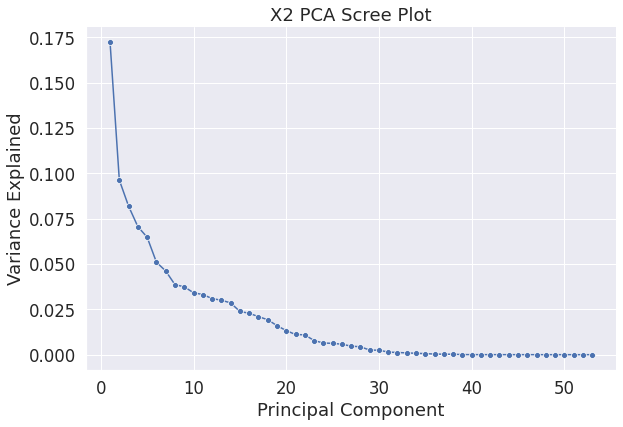

In [48]:
PC_values2 = np.arange(pca.n_components_) + 1
ax2 = sns.relplot(x=PC_values2, y= pca.explained_variance_ratio_, marker='o', kind="line", height=6, aspect=1.5)
ax2.set(xlabel='Principal Component',ylabel = 'Variance Explained',title='X2 PCA Scree Plot')
ax2.figure.savefig("X2/X2PCA.png")

In [49]:
factors = pd.DataFrame({'Factors': X2_normalized.columns, 'Eigenvector 1': pca.components_[0]})
factors = factors.sort_values(by=['Eigenvector 1'], ascending=False)
print(factors)

                                              Factors  Eigenvector 1
44                           Metallurgy and Materials       0.925248
15                                    A2C_since_Sep01       0.086538
20                                           eng_type       0.032873
19                                         Decision_U       0.026865
12                               decision_since_Sep01       0.018721
26                                      Toefl_Overall       0.018068
3                                         master_prev       0.014196
13                                    A1C_since_Sep01       0.013171
36                                Institution_app_num       0.012305
16                               Response_since_Sep01       0.012209
8                              Days at Decision Stage       0.011821
14                                    A1U_since_Sep01       0.010995
39                                          multi_app       0.010491
37                              In

In [50]:
pca_fit = pca.fit(X3_normalized)

print('Explained Variance Ratio (%):')
print(pca.explained_variance_ratio_*100)
print('Singular Values:')
print(pca.singular_values_)

Explained Variance Ratio (%):
[1.26154529e+01 6.35511799e+00 5.95297191e+00 5.24816458e+00
 4.95038333e+00 4.12984103e+00 3.78544127e+00 3.46328526e+00
 3.20147732e+00 3.15612676e+00 3.07713078e+00 2.50771389e+00
 2.29531299e+00 2.27015407e+00 2.05660426e+00 1.98240944e+00
 1.92894000e+00 1.86304634e+00 1.66717911e+00 1.48434730e+00
 1.44264912e+00 1.35609170e+00 1.33054789e+00 1.19571940e+00
 1.13103011e+00 1.09718793e+00 1.07032439e+00 9.48548115e-01
 8.64347173e-01 8.60398797e-01 8.00002661e-01 7.82690344e-01
 7.70006845e-01 6.86700694e-01 5.89811619e-01 5.68643023e-01
 5.59082295e-01 5.34378963e-01 5.17057581e-01 4.97327910e-01
 4.63484484e-01 4.33047604e-01 3.90060429e-01 3.75127204e-01
 3.57534656e-01 3.56836261e-01 3.49069283e-01 3.27433336e-01
 3.16262970e-01 3.01259577e-01 2.90958515e-01 2.90429354e-01
 2.81302244e-01 2.77160605e-01 2.70576163e-01 2.60893145e-01
 2.52969426e-01 2.32019743e-01 2.25817389e-01 2.03786368e-01
 1.80065834e-01 1.54124471e-01 1.22901569e-01 1.1198349

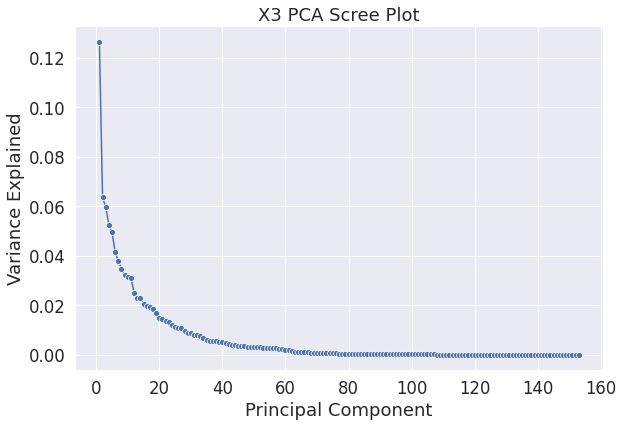

In [51]:
PC_values3 = np.arange(pca.n_components_) + 1
ax3 = sns.relplot(x=PC_values3, y= pca.explained_variance_ratio_, marker='o', kind="line", height=6, aspect=1.5)
ax3.set(xlabel='Principal Component',ylabel = 'Variance Explained',title='X3 PCA Scree Plot')
ax3.figure.savefig("X3/X3PCA.png")

In [52]:
factors = pd.DataFrame({'Factors': X3_normalized.columns, 'Eigenvector 1': pca.components_[0]})
factors = factors.sort_values(by=['Eigenvector 1'], ascending=False)
print(factors)

                                               Factors  Eigenvector 1
43                            Metallurgy and Materials       0.847751
92     MSc Advanced Chemical Eng with Bioprocessing FT       0.235960
96                      MSc Elec Pow Syst w Adv Res FT       0.192959
80                           PGCert Des Lear Env DL PT       0.119716
74                         BSc Computer Sci FT (Dubai)       0.097086
14                                     A2C_since_Sep01       0.081628
95                      MSc Formulation Engineering FT       0.051125
114                        MSc Mathematical Finance FT       0.034425
19                                            eng_type       0.029759
18                                          Decision_U       0.028809
134     MSc Adv Chem Eng with Healthcare Technology FT       0.025335
78                      MSc Art Int + Comp Sc PT (Dub)       0.017557
2                                          master_prev       0.016940
25                  

## 2)Find the most effective features
### 2)1) Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable.\
The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.\
Uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Dataset.

#### X1: based on PCA elbow plot, pick the first 10 features

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit1 = bestfeatures.fit(X1_normalized,Y)

# save the transformed X1 set
X1_corela = bestfeatures.transform(X1_normalized)
np.save('X1/X1_corela.npy', X1_corela) # save
#X1_corela = np.load('X1/X1_corela.npy') 

# print the score
featureScores1 = pd.DataFrame({'Feature':X1_normalized.columns, 'Score':fit1.scores_}).sort_values(by=['Score'], ascending=False)
featureScores1.to_csv('X1/featureScores1.csv')
featureScores1.nlargest(10,'Score')

,Feature,Score
17,Decision_R,399.759036
15,Response_since_Sep01,272.100568
18,Decision_U,269.140172
40,Computer Science,146.724728
0,uob_alum,93.057209
39,offer_num,57.895919
1,home_oversea,46.148808
19,eng_type,43.816719
44,Civil Engineering,37.297468
10,Response days,31.857041


In [26]:
print(list(featureScores1['Feature'][0:10]))

['Decision_R', 'Response_since_Sep01', 'Decision_U', 'Computer Science', 'uob_alum', 'offer_num', 'home_oversea', 'eng_type', 'Civil Engineering', 'Response days']


#### X2: based on PCA elbow plot, pick the first 10 features

In [27]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit2 = bestfeatures.fit(X2_normalized,Y)

# save the transformed X2 set
X2_corela = bestfeatures.transform(X2_normalized)
np.save('X2/X2_corela.npy', X2_corela) # save

# print the score
featureScores2 = pd.DataFrame({'Feature':X2_normalized.columns, 'Score':fit2.scores_}).sort_values(by=['Score'], ascending=False)
featureScores2.to_csv('X2/featureScores2.csv')
featureScores2.nlargest(10,'Score')

,Feature,Score
18,Decision_R,399.759036
16,Response_since_Sep01,272.100568
19,Decision_U,269.140172
41,Computer Science,146.724728
1,uob_alum,93.057209
40,offer_num,57.895919
2,home_oversea,46.148808
20,eng_type,43.816719
45,Civil Engineering,37.297468
11,Response days,31.857041


In [28]:
print(list(featureScores2['Feature'][0:10]))

['Decision_R', 'Response_since_Sep01', 'Decision_U', 'Computer Science', 'uob_alum', 'offer_num', 'home_oversea', 'eng_type', 'Civil Engineering', 'Response days']


#### X3: based on PCA elbow plot, pick the first 20 features

In [29]:
#apply SelectKBest class to extract top 20 best features
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit3 = bestfeatures.fit(X3_normalized,Y)

# save the transformed X3 set
X3_corela = bestfeatures.transform(X3_normalized)
np.save('X3/X3_corela.npy', X3_corela) # save

# print the score
featureScores3 = pd.DataFrame({'Feature':X3_normalized.columns, 'Score':fit3.scores_}).sort_values(by=['Score'], ascending=False)
featureScores3.to_csv('X3/featureScores3.csv')
featureScores3.nlargest(20,'Score')

,Feature,Score
17,Decision_R,399.759036
15,Response_since_Sep01,272.100568
18,Decision_U,269.140172
40,Computer Science,146.724728
0,uob_alum,93.057209
127,MSc Adv Eng Man (Constr Man)PT,78.444679
39,offer_num,57.895919
1,home_oversea,46.148808
19,eng_type,43.816719
62,MSc Rail Sys Eng+Int w Pre FT,42.857570


In [30]:
print(list(featureScores3['Feature'][0:20]))

['Decision_R', 'Response_since_Sep01', 'Decision_U', 'Computer Science', 'uob_alum', 'MSc Adv Eng Man (Constr Man)PT', 'offer_num', 'home_oversea', 'eng_type', 'MSc Rail Sys Eng+Int w Pre FT', 'MSc Phys + Tech Nuc React FT', 'MSc Structural Engineering (FT)', 'Civil Engineering', 'MSc Adv Eng Man (Constr Man)FT', 'Response days', 'MSc Advanced Chemical Eng with Bioprocessing FT', 'Mechanical Engineering', 'Decision_C', 'multi_app', 'Institution_offer_num']


### 2)2)Feature Importance with Tree Based Classifiers
Tree Based Classifiers implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. It can be used to compute impurity-based feature importances.\
Feature importance gives a score for each feature of the data, the higher the score more important or relevant is the feature towards the target variable.\
Here Extra Tree Classifier would extract the top 10 or 20 features for the dataset.

In [31]:
from sklearn.ensemble import ExtraTreesClassifier

tree1 = ExtraTreesClassifier()
tree1.fit(X1_normalized,Y)

feat_importances1 = pd.DataFrame({'feature':X1_normalized.columns, 'value':tree1.feature_importances_}).sort_values(by=['value'], ascending=False)
feat_importances1.to_csv('X1/treeset1.csv')

X1_tree = X1_normalized[list(feat_importances1['feature'])[0:10]]
X1_tree.to_pickle("X1/X1_tree.pkl") 

feat_importances1.nlargest(10,'value')

,feature,value
15,Response_since_Sep01,0.133193
10,Response days,0.064530
11,decision_since_Sep01,0.038698
36,Institution_offer_num,0.037712
12,A1C_since_Sep01,0.037701
35,Institution_app_num,0.036745
37,Insti_weight,0.036405
13,A1U_since_Sep01,0.034828
1,home_oversea,0.034737
8,Total Days Admissions,0.034688


In [32]:
tree2 = ExtraTreesClassifier()
tree2.fit(X2_normalized,Y)

feat_importances2 = pd.DataFrame({'feature':X2_normalized.columns, 'value':tree2.feature_importances_}).sort_values(by=['value'], ascending=False)

feat_importances2.to_csv('X2/treeset2.csv')

X2_tree = X2_normalized[list(feat_importances1['feature'])[0:10]]
X2_tree.to_pickle("X2/X2_tree.pkl") 

feat_importances2.nlargest(10,'value')

,feature,value
16,Response_since_Sep01,0.134527
11,Response days,0.062073
37,Institution_offer_num,0.036775
12,decision_since_Sep01,0.036331
13,A1C_since_Sep01,0.036011
36,Institution_app_num,0.035825
38,Insti_weight,0.034871
14,A1U_since_Sep01,0.034110
17,Decision_C,0.033746
9,Total Days Admissions,0.033514


In [33]:
tree3 = ExtraTreesClassifier()
tree3.fit(X3_normalized,Y)

feat_importances3 = pd.DataFrame({'feature':X3_normalized.columns, 'value':tree3.feature_importances_}).sort_values(by=['value'], ascending=False)

feat_importances3.to_csv('X3/treeset3.csv')

X3_tree = X3_normalized[list(feat_importances1['feature'])[0:20]]
X3_tree.to_pickle("X3/X3_tree.pkl") 

feat_importances2.nlargest(20,'value')

,feature,value
16,Response_since_Sep01,0.134527
11,Response days,0.062073
37,Institution_offer_num,0.036775
12,decision_since_Sep01,0.036331
13,A1C_since_Sep01,0.036011
36,Institution_app_num,0.035825
38,Insti_weight,0.034871
14,A1U_since_Sep01,0.034110
17,Decision_C,0.033746
9,Total Days Admissions,0.033514


# **Modelling**
In this part, each feature set(X1,X2,X3) would go through combinations of methods in each step, to obtain a series of classifiers. \
The steps are:

(1) feature selection\
no selection(X_normalized)\
correlation based(X_corela)\
tree based(X_tree)\

*combine*

(2) data balancing\
w/o balancing\
over sample\
under sample\

*combine*

(3) modelling\
Logistic Regression\
Naive Bayes\
Random Forest\
Support Vector Machines

In [34]:
import joblib
# load the feature sets
X1_normalized = joblib.load('X1/X1_normalized.pkl')
X1_corela = np.load('X1/X1_corela.npy')
X1_tree = joblib.load('X1/X1_tree.pkl')


X2_normalized = joblib.load('X2/X2_normalized.pkl')
X2_corela = np.load('X2/X2_corela.npy')
X2_tree = joblib.load('X2/X2_tree.pkl')


X3_normalized = joblib.load('X3/X3_normalized.pkl')
X3_corela = np.load('X3/X3_corela.npy')
X3_tree = joblib.load('X3/X3_tree.pkl')


# **X1**

## **X1_normalized**

### Split the training set and testing set

In [6]:
from sklearn.model_selection import train_test_split

In [13]:
# split the data in 70:30 for train:test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X1_normalized, Y, test_size = 0.3, random_state = 2, stratify = Y)

### Check the distribution of classes of the target variable, to see whether the data balancing is needed

In [14]:
from collections import Counter
print(f"Training target statistics: {Counter(Y_train)}")
print(f"Testing target statistics: {Counter(Y_test)}")

Training target statistics: Counter({0: 5308, 1: 930})
Testing target statistics: Counter({0: 2276, 1: 398})


It turns out that the datased is unbalanced and need the balancing

### **Balancing**
### 1)Without balancing

####  Logistic Regression

In [15]:
# Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0, max_iter=1000)
classifier1.fit(X_train, Y_train)

# Predicting result on test set
Y_pred = classifier1.predict(X_test)

# Report on prediction
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2276
           1       0.72      0.32      0.44       398

    accuracy                           0.88      2674
   macro avg       0.81      0.65      0.69      2674
weighted avg       0.87      0.88      0.86      2674



<AxesSubplot:>

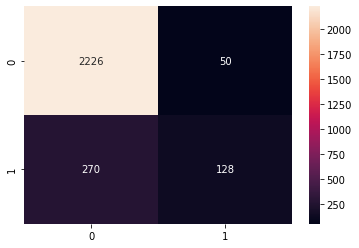

In [16]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')

####  Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB

classifier2 = GaussianNB()
classifier2.fit(X_train, Y_train)
# Predicting result
Y_pred = classifier2.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.59      0.73      2276
           1       0.26      0.82      0.40       398

    accuracy                           0.63      2674
   macro avg       0.61      0.71      0.56      2674
weighted avg       0.85      0.63      0.68      2674



### Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

classifier3 = RandomForestClassifier(max_depth=2, random_state=0)

classifier3.fit(X_train, Y_train)
# Predicting result
Y_pred = classifier3.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2276
           1       0.00      0.00      0.00       398

    accuracy                           0.85      2674
   macro avg       0.43      0.50      0.46      2674
weighted avg       0.72      0.85      0.78      2674



/jupyter/.home/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/jupyter/.home/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/jupyter/.home/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Support Vector Machines

In [20]:
from sklearn.svm import SVC
classifier4 = SVC(kernel = 'rbf',random_state = 0)
classifier4.fit(X_train, Y_train)
# Predicting result
Y_pred = classifier4.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2276
           1       0.79      0.26      0.39       398

    accuracy                           0.88      2674
   macro avg       0.84      0.62      0.66      2674
weighted avg       0.87      0.88      0.85      2674



#### Conclusion: since the data is lack of balance, the model is not reliable

### 2)With Balancing

### 2)1. Oversample the smallest class

In [21]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_train_balanced, Y_train_balanced = over_sampler.fit_resample(X_train, Y_train)
X_test_balanced, Y_test_balanced = over_sampler.fit_resample(X_test, Y_test)
print(f"Training target statistics: {Counter(Y_train_balanced)}")
print(f"Testing target statistics: {Counter(Y_test_balanced)}")

Training target statistics: Counter({0: 5308, 1: 5308})
Testing target statistics: Counter({1: 2276, 0: 2276})


####  Logistic Regression

In [22]:
# Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0, max_iter=1000)
classifier1.fit(X_train_balanced, Y_train_balanced)

# Predicting result on test set
Y_pred = classifier1.predict(X_test_balanced)

# Report on prediction
from sklearn.metrics import classification_report
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      2276
           1       0.80      0.85      0.83      2276

    accuracy                           0.82      4552
   macro avg       0.82      0.82      0.82      4552
weighted avg       0.82      0.82      0.82      4552



#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test_balanced, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')

####  Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

classifier2 = GaussianNB()
classifier2.fit(X_train_balanced, Y_train_balanced)
# Predicting result
Y_pred = classifier2.predict(X_test_balanced)
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.43      0.58      2276
           1       0.62      0.92      0.74      2276

    accuracy                           0.68      4552
   macro avg       0.73      0.68      0.66      4552
weighted avg       0.73      0.68      0.66      4552



#Making the Confusion Matrix 
cm = confusion_matrix(Y_test_balanced, Y_pred)
ax = sns.heatmap(cm, annot=True,fmt='d')
#ax.figure.savefig('graph/NB_confusion.png')

####  Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

classifier3 = RandomForestClassifier(max_depth=3, random_state=0)

classifier3.fit(X_train_balanced, Y_train_balanced)
# Predicting result
Y_pred = classifier3.predict(X_test_balanced)
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79      2276
           1       0.78      0.85      0.81      2276

    accuracy                           0.80      4552
   macro avg       0.81      0.80      0.80      4552
weighted avg       0.81      0.80      0.80      4552



#Making the Confusion Matrix cm = confusion_matrix(Y_test_balanced, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')

#### Support Vector Machines

In [25]:
from sklearn.svm import SVC
classifier4 = SVC(kernel = 'rbf',random_state = 0)
classifier4.fit(X_train_balanced, Y_train_balanced)
# Predicting result
Y_pred = classifier4.predict(X_test_balanced)
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      2276
           1       0.79      0.88      0.83      2276

    accuracy                           0.82      4552
   macro avg       0.83      0.82      0.82      4552
weighted avg       0.83      0.82      0.82      4552



#Making the Confusion Matrix 
cm = confusion_matrix(Y_test_balanced, Y_pred)
ax = sns.heatmap(cm, annot=True,fmt='d')
#ax.figure.savefig('graph/SVM_confusion.png')

### 2)2. Undersample the larger class

In [26]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X2_train_balanced, Y2_train_balanced = under_sampler.fit_resample(X_train, Y_train)
X2_test_balanced, Y2_test_balanced = under_sampler.fit_resample(X_test, Y_test)

print(f"Training target statistics: {Counter(Y2_train_balanced)}")
print(f"Testing target statistics: {Counter(Y2_test_balanced)}")

Training target statistics: Counter({0: 930, 1: 930})
Testing target statistics: Counter({0: 398, 1: 398})


####  Logistic Regression

In [27]:
# Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0, max_iter=1000)
classifier1.fit(X2_train_balanced, Y2_train_balanced)

# Predicting result on test set
Y_pred = classifier1.predict(X2_test_balanced)

# Report on prediction
from sklearn.metrics import classification_report
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       398
           1       0.79      0.81      0.80       398

    accuracy                           0.80       796
   macro avg       0.80      0.80      0.80       796
weighted avg       0.80      0.80      0.80       796



####  Naive Bayes

In [28]:
classifier2 = GaussianNB()
classifier2.fit(X2_train_balanced, Y2_train_balanced)
# Predicting result
Y_pred = classifier2.predict(X2_test_balanced)
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.27      0.42       398
           1       0.57      0.96      0.71       398

    accuracy                           0.62       796
   macro avg       0.72      0.62      0.57       796
weighted avg       0.72      0.62      0.57       796



#### Random Forest

In [29]:
classifier3 = RandomForestClassifier(max_depth=3, random_state=0)

classifier3.fit(X2_train_balanced, Y2_train_balanced)
# Predicting result
Y_pred = classifier3.predict(X2_test_balanced)
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       398
           1       0.78      0.83      0.80       398

    accuracy                           0.80       796
   macro avg       0.80      0.80      0.80       796
weighted avg       0.80      0.80      0.80       796



#### Support Vector Machines

In [30]:
from sklearn.svm import SVC
classifier4 = SVC(kernel = 'rbf',random_state = 0)
classifier4.fit(X2_train_balanced, Y2_train_balanced)
# Predicting result
Y_pred = classifier4.predict(X2_test_balanced)
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79       398
           1       0.77      0.87      0.82       398

    accuracy                           0.81       796
   macro avg       0.81      0.81      0.81       796
weighted avg       0.81      0.81      0.81       796



## **X1_corela**

### Split the training set and testing set

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# split the data in 70:30 for train:test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X1_corela, Y, test_size = 0.3, random_state = 2, stratify = Y)

### Without balancing

In [33]:
from collections import Counter
print(f"Training target statistics: {Counter(Y_train)}")
print(f"Testing target statistics: {Counter(Y_test)}")

Training target statistics: Counter({0: 5308, 1: 930})
Testing target statistics: Counter({0: 2276, 1: 398})


#### Applying Logistic Regression

In [34]:
# Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X_train, Y_train)

# Predicting result on test set
Y_pred = classifier.predict(X_test)

# Report on prediction
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2276
           1       0.62      0.30      0.40       398

    accuracy                           0.87      2674
   macro avg       0.75      0.63      0.66      2674
weighted avg       0.85      0.87      0.85      2674



#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')

In [35]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, Y_train)
# Predicting result
Y_pred = classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2276
           1       0.47      0.37      0.42       398

    accuracy                           0.84      2674
   macro avg       0.68      0.65      0.66      2674
weighted avg       0.83      0.84      0.84      2674



### Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, Y_train)
# Predicting result
Y_pred = classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2276
           1       0.00      0.00      0.00       398

    accuracy                           0.85      2674
   macro avg       0.43      0.50      0.46      2674
weighted avg       0.72      0.85      0.78      2674



/jupyter/.home/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/jupyter/.home/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/jupyter/.home/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Support Vector Machines

In [38]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train, Y_train)
# Predicting result
Y_pred = classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2276
           1       0.77      0.25      0.38       398

    accuracy                           0.88      2674
   macro avg       0.83      0.62      0.66      2674
weighted avg       0.87      0.88      0.85      2674



### With Balancing

### 1. Oversample the smallest class

In [39]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_train_balanced, Y_train_balanced = over_sampler.fit_resample(X_train, Y_train)
X_test_balanced, Y_test_balanced = over_sampler.fit_resample(X_test, Y_test)
print(f"Training target statistics: {Counter(Y_train_balanced)}")
print(f"Testing target statistics: {Counter(Y_test_balanced)}")

Training target statistics: Counter({0: 5308, 1: 5308})
Testing target statistics: Counter({1: 2276, 0: 2276})


#### Applying Logistic Regression

In [40]:
# Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X_train_balanced, Y_train_balanced)

# Predicting result on test set
Y_pred = classifier.predict(X_test_balanced)

# Report on prediction
from sklearn.metrics import classification_report
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      2276
           1       0.79      0.79      0.79      2276

    accuracy                           0.79      4552
   macro avg       0.79      0.79      0.79      4552
weighted avg       0.79      0.79      0.79      4552



#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test_balanced, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')

#### Applying Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train_balanced, Y_train_balanced)
# Predicting result
Y_pred = classifier.predict(X_test_balanced)
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.61      0.90      0.73      2276
           1       0.82      0.42      0.56      2276

    accuracy                           0.66      4552
   macro avg       0.71      0.66      0.64      4552
weighted avg       0.71      0.66      0.64      4552



#Making the Confusion Matrix
cm = confusion_matrix(Y_test_balanced, Y_pred)
ax = sns.heatmap(cm, annot=True,fmt='d')
#ax.figure.savefig('conf_matr/X1_corela_oversam_NB.png')

#### Applying RandomForest

In [42]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=3, random_state=0)

classifier.fit(X_train_balanced, Y_train_balanced)
# Predicting result
Y_pred = classifier.predict(X_test_balanced)
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77      2276
           1       0.74      0.92      0.82      2276

    accuracy                           0.80      4552
   macro avg       0.82      0.80      0.80      4552
weighted avg       0.82      0.80      0.80      4552



#### Applying Support Vector Machines

In [43]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train_balanced, Y_train_balanced)
# Predicting result
Y_pred = classifier.predict(X_test_balanced)
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.74      0.80      2276
           1       0.78      0.90      0.83      2276

    accuracy                           0.82      4552
   macro avg       0.83      0.82      0.82      4552
weighted avg       0.83      0.82      0.82      4552



cm = confusion_matrix(Y_test_balanced, Y_pred)
ax = sns.heatmap(cm, annot=True,fmt='d')
#ax.figure.savefig('graph/SVM_confusion.png')

### 2. Undersample the larger class

In [44]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X2_train_balanced, Y2_train_balanced = under_sampler.fit_resample(X_train, Y_train)
X2_test_balanced, Y2_test_balanced = under_sampler.fit_resample(X_test, Y_test)

print(f"Training target statistics: {Counter(Y2_train_balanced)}")
print(f"Testing target statistics: {Counter(Y2_test_balanced)}")

Training target statistics: Counter({0: 930, 1: 930})
Testing target statistics: Counter({0: 398, 1: 398})


#### Logistic Regression

In [45]:
# Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X2_train_balanced, Y2_train_balanced)

# Predicting result on test set
Y_pred = classifier.predict(X2_test_balanced)

# Report on prediction
from sklearn.metrics import classification_report
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       398
           1       0.80      0.77      0.79       398

    accuracy                           0.79       796
   macro avg       0.79      0.79      0.79       796
weighted avg       0.79      0.79      0.79       796



#### Naive Bayes

In [46]:
classifier = GaussianNB()
classifier.fit(X2_train_balanced, Y2_train_balanced)
# Predicting result
Y_pred = classifier.predict(X2_test_balanced)
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.61      0.91      0.73       398
           1       0.82      0.41      0.54       398

    accuracy                           0.66       796
   macro avg       0.71      0.66      0.64       796
weighted avg       0.71      0.66      0.64       796



#### Random Forest

In [47]:
classifier = RandomForestClassifier(max_depth=3, random_state=0)

classifier.fit(X2_train_balanced, Y2_train_balanced)
# Predicting result
Y_pred = classifier.predict(X2_test_balanced)
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77       398
           1       0.74      0.91      0.82       398

    accuracy                           0.80       796
   macro avg       0.81      0.80      0.79       796
weighted avg       0.81      0.80      0.79       796



#### Support Vector Machines

In [48]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X2_train_balanced, Y2_train_balanced)
# Predicting result
Y_pred = classifier.predict(X2_test_balanced)
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.70      0.78       398
           1       0.75      0.90      0.82       398

    accuracy                           0.80       796
   macro avg       0.81      0.80      0.80       796
weighted avg       0.81      0.80      0.80       796



## **X1_tree**

### Split the training set and testing set

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
# split the data in 70:30 for train:test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X1_tree, Y, test_size = 0.3, random_state = 2, stratify = Y)

### Without balancing

In [51]:
from collections import Counter
print(f"Training target statistics: {Counter(Y_train)}")
print(f"Testing target statistics: {Counter(Y_test)}")

Training target statistics: Counter({0: 5308, 1: 930})
Testing target statistics: Counter({0: 2276, 1: 398})


#### Applying Logistic Regression

In [52]:
# Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X_train, Y_train)

# Predicting result on test set
Y_pred = classifier.predict(X_test)

# Report on prediction
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2276
           1       0.43      0.06      0.10       398

    accuracy                           0.85      2674
   macro avg       0.65      0.52      0.51      2674
weighted avg       0.79      0.85      0.80      2674



<AxesSubplot:>

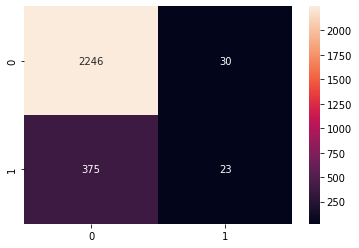

In [53]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')

In [54]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, Y_train)
# Predicting result
Y_pred = classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      2276
           1       0.32      0.29      0.30       398

    accuracy                           0.80      2674
   macro avg       0.60      0.59      0.59      2674
weighted avg       0.79      0.80      0.80      2674



### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, Y_train)
# Predicting result
Y_pred = classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2276
           1       0.00      0.00      0.00       398

    accuracy                           0.85      2674
   macro avg       0.43      0.50      0.46      2674
weighted avg       0.72      0.85      0.78      2674



/jupyter/.home/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/jupyter/.home/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/jupyter/.home/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Support Vector Machines

In [56]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train, Y_train)
# Predicting result
Y_pred = classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2276
           1       0.73      0.06      0.10       398

    accuracy                           0.86      2674
   macro avg       0.80      0.53      0.51      2674
weighted avg       0.84      0.86      0.80      2674



### With Balancing

#### 1. Oversample the smallest class

In [57]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_train_balanced, Y_train_balanced = over_sampler.fit_resample(X_train, Y_train)
X_test_balanced, Y_test_balanced = over_sampler.fit_resample(X_test, Y_test)
print(f"Training target statistics: {Counter(Y_train_balanced)}")
print(f"Testing target statistics: {Counter(Y_test_balanced)}")

Training target statistics: Counter({0: 5308, 1: 5308})
Testing target statistics: Counter({1: 2276, 0: 2276})


#### Applying Logistic Regression

In [58]:
# Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X_train_balanced, Y_train_balanced)

# Predicting result on test set
Y_pred = classifier.predict(X_test_balanced)

# Report on prediction
from sklearn.metrics import classification_report
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72      2276
           1       0.71      0.82      0.76      2276

    accuracy                           0.74      4552
   macro avg       0.75      0.74      0.74      4552
weighted avg       0.75      0.74      0.74      4552



<AxesSubplot:>

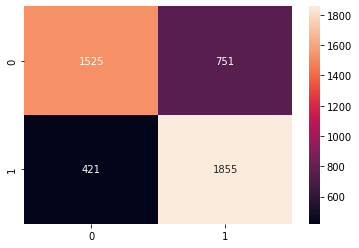

In [59]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test_balanced, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')

#### Applying RandomForest

In [60]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=3, random_state=0)

classifier.fit(X_train_balanced, Y_train_balanced)
# Predicting result
Y_pred = classifier.predict(X_test_balanced)
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.62      0.71      2276
           1       0.70      0.87      0.77      2276

    accuracy                           0.74      4552
   macro avg       0.76      0.74      0.74      4552
weighted avg       0.76      0.74      0.74      4552



<AxesSubplot:>

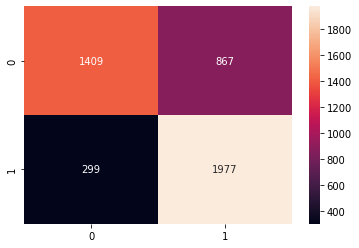

In [61]:
cm = confusion_matrix(Y_test_balanced, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')

#### Applying SVM

In [63]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train_balanced, Y_train_balanced)
# Predicting result
Y_pred = classifier.predict(X_test_balanced)
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.61      0.71      2276
           1       0.70      0.89      0.78      2276

    accuracy                           0.75      4552
   macro avg       0.77      0.75      0.74      4552
weighted avg       0.77      0.75      0.74      4552



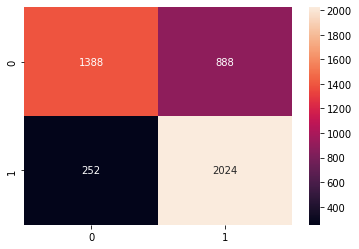

In [64]:
cm = confusion_matrix(Y_test_balanced, Y_pred)
ax = sns.heatmap(cm, annot=True,fmt='d')
#ax.figure.savefig('graph/SVM_confusion.png')

#### Applying Naive Bayes

In [65]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train_balanced, Y_train_balanced)
# Predicting result
Y_pred = classifier.predict(X_test_balanced)
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.64      0.79      0.71      2276
           1       0.73      0.55      0.62      2276

    accuracy                           0.67      4552
   macro avg       0.68      0.67      0.67      4552
weighted avg       0.68      0.67      0.67      4552



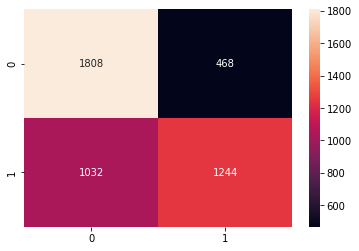

In [66]:
cm = confusion_matrix(Y_test_balanced, Y_pred)
ax = sns.heatmap(cm, annot=True,fmt='d')
#ax.figure.savefig('graph/NB_confusion.png')

#### 2. Undersample the larger class

In [67]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X2_train_balanced, Y2_train_balanced = under_sampler.fit_resample(X_train, Y_train)
X2_test_balanced, Y2_test_balanced = under_sampler.fit_resample(X_test, Y_test)

print(f"Training target statistics: {Counter(Y2_train_balanced)}")
print(f"Testing target statistics: {Counter(Y2_test_balanced)}")

Training target statistics: Counter({0: 930, 1: 930})
Testing target statistics: Counter({0: 398, 1: 398})


Logistic

In [68]:
# Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X2_train_balanced, Y2_train_balanced)

# Predicting result on test set
Y_pred = classifier.predict(X2_test_balanced)

# Report on prediction
from sklearn.metrics import classification_report
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70       398
           1       0.69      0.78      0.73       398

    accuracy                           0.72       796
   macro avg       0.72      0.72      0.71       796
weighted avg       0.72      0.72      0.71       796



tree

In [69]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(X2_train_balanced, Y2_train_balanced)
# Predicting result
Y_pred = classifier.predict(X2_test_balanced)
print(classification_report(Y2_test_balanced, Y_pred))

NameError: name 'tree' is not defined

NB

In [70]:
classifier = GaussianNB()
classifier.fit(X2_train_balanced, Y2_train_balanced)
# Predicting result
Y_pred = classifier.predict(X2_test_balanced)
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.63      0.77      0.69       398
           1       0.70      0.55      0.61       398

    accuracy                           0.66       796
   macro avg       0.67      0.66      0.65       796
weighted avg       0.67      0.66      0.65       796



RF

In [71]:
classifier = RandomForestClassifier(max_depth=3, random_state=0)

classifier.fit(X2_train_balanced, Y2_train_balanced)
# Predicting result
Y_pred = classifier.predict(X2_test_balanced)
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.59      0.69       398
           1       0.68      0.87      0.76       398

    accuracy                           0.73       796
   macro avg       0.75      0.73      0.73       796
weighted avg       0.75      0.73      0.73       796



SVM

In [72]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X2_train_balanced, Y2_train_balanced)
# Predicting result
Y_pred = classifier.predict(X2_test_balanced)
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.60      0.69       398
           1       0.68      0.86      0.76       398

    accuracy                           0.73       796
   macro avg       0.74      0.73      0.72       796
weighted avg       0.74      0.73      0.72       796



# X2

X2_normalized\
X2_corela\
X2_tree\

*combine\

w/o balancing\
over sample\
under sample\

*combine\

LR\
NB\
RF\
SVM\

## X2_normalized

### Split the training set and testing set

In [45]:
from sklearn.model_selection import train_test_split

In [73]:
# split the data in 70:30 for train:test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X2_normalized, Y, test_size = 0.3, random_state = 2, stratify = Y)

## Without balancing

In [74]:
from collections import Counter
print(f"Training target statistics: {Counter(Y_train)}")
print(f"Testing target statistics: {Counter(Y_test)}")

Training target statistics: Counter({0: 5308, 1: 930})
Testing target statistics: Counter({0: 2276, 1: 398})


#### Applying Logistic Regression

In [75]:
# Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X_train, Y_train)

# Predicting result on test set
Y_pred = classifier.predict(X_test)

# Report on prediction
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2276
           1       0.74      0.32      0.45       398

    accuracy                           0.88      2674
   macro avg       0.81      0.65      0.69      2674
weighted avg       0.87      0.88      0.86      2674



<AxesSubplot:>

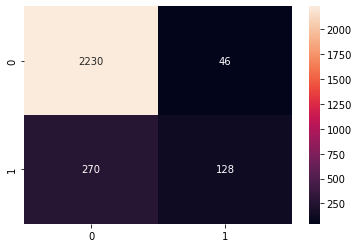

In [76]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')

In [77]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, Y_train)
# Predicting result
Y_pred = classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.58      0.72      2276
           1       0.26      0.82      0.39       398

    accuracy                           0.62      2674
   macro avg       0.60      0.70      0.56      2674
weighted avg       0.85      0.62      0.67      2674



### Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, Y_train)
# Predicting result
Y_pred = classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2276
           1       1.00      0.00      0.01       398

    accuracy                           0.85      2674
   macro avg       0.93      0.50      0.46      2674
weighted avg       0.87      0.85      0.78      2674



### SVM

In [80]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train, Y_train)
# Predicting result
Y_pred = classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2276
           1       0.79      0.26      0.39       398

    accuracy                           0.88      2674
   macro avg       0.84      0.62      0.66      2674
weighted avg       0.87      0.88      0.85      2674



conclusion: since the data is lack of balance, the model is not reliable

## With Balancing

#### 1. Oversample the smallest class

In [81]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_train_balanced, Y_train_balanced = over_sampler.fit_resample(X_train, Y_train)
X_test_balanced, Y_test_balanced = over_sampler.fit_resample(X_test, Y_test)
print(f"Training target statistics: {Counter(Y_train_balanced)}")
print(f"Testing target statistics: {Counter(Y_test_balanced)}")

Training target statistics: Counter({0: 5308, 1: 5308})
Testing target statistics: Counter({1: 2276, 0: 2276})


#### Applying Logistic Regression

In [150]:
# Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X_train_balanced, Y_train_balanced)

# Predicting result on test set
Y_pred = classifier.predict(X_test_balanced)

# Report on prediction
from sklearn.metrics import classification_report
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      2276
           1       0.80      0.85      0.82      2276

    accuracy                           0.82      4552
   macro avg       0.82      0.82      0.82      4552
weighted avg       0.82      0.82      0.82      4552



<AxesSubplot:>

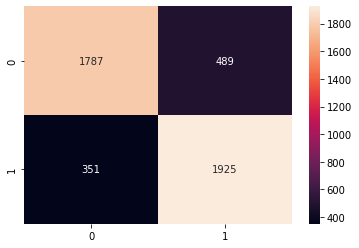

In [151]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test_balanced, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')

#### Applying RandomForest

In [152]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=3, random_state=0)

classifier.fit(X_train_balanced, Y_train_balanced)
# Predicting result
Y_pred = classifier.predict(X_test_balanced)
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      2276
           1       0.76      0.92      0.84      2276

    accuracy                           0.82      4552
   macro avg       0.83      0.82      0.82      4552
weighted avg       0.83      0.82      0.82      4552



<AxesSubplot:>

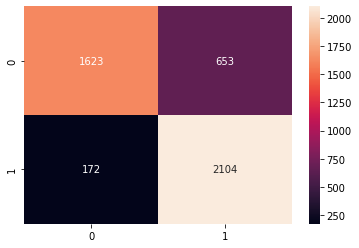

In [153]:
cm = confusion_matrix(Y_test_balanced, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')

#### Applying SVM

In [155]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train_balanced, Y_train_balanced)
# Predicting result
Y_pred = classifier.predict(X_test_balanced)
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81      2276
           1       0.79      0.87      0.83      2276

    accuracy                           0.82      4552
   macro avg       0.82      0.82      0.82      4552
weighted avg       0.82      0.82      0.82      4552



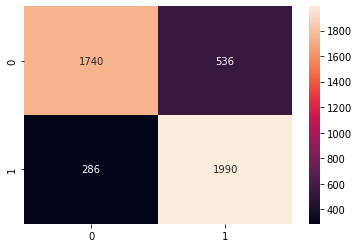

In [156]:
cm = confusion_matrix(Y_test_balanced, Y_pred)
ax = sns.heatmap(cm, annot=True,fmt='d')
#ax.figure.savefig('graph/SVM_confusion.png')

#### Applying Naive Bayes

In [157]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train_balanced, Y_train_balanced)
# Predicting result
Y_pred = classifier.predict(X_test_balanced)
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.43      0.58      2276
           1       0.62      0.92      0.74      2276

    accuracy                           0.68      4552
   macro avg       0.74      0.68      0.66      4552
weighted avg       0.74      0.68      0.66      4552



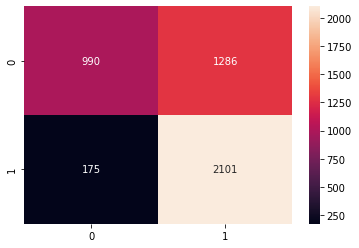

In [158]:
cm = confusion_matrix(Y_test_balanced, Y_pred)
ax = sns.heatmap(cm, annot=True,fmt='d')
#ax.figure.savefig('graph/NB_confusion.png')

#### 2. Undersample the larger class

In [159]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X2_train_balanced, Y2_train_balanced = under_sampler.fit_resample(X_train, Y_train)
X2_test_balanced, Y2_test_balanced = under_sampler.fit_resample(X_test, Y_test)

print(f"Training target statistics: {Counter(Y2_train_balanced)}")
print(f"Testing target statistics: {Counter(Y2_test_balanced)}")

Training target statistics: Counter({0: 930, 1: 930})
Testing target statistics: Counter({0: 398, 1: 398})


Logistic

In [160]:
# Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X2_train_balanced, Y2_train_balanced)

# Predicting result on test set
Y_pred = classifier.predict(X2_test_balanced)

# Report on prediction
from sklearn.metrics import classification_report
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       398
           1       0.80      0.82      0.81       398

    accuracy                           0.81       796
   macro avg       0.81      0.81      0.81       796
weighted avg       0.81      0.81      0.81       796



tree

In [161]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(X2_train_balanced, Y2_train_balanced)
# Predicting result
Y_pred = classifier.predict(X2_test_balanced)
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       398
           1       0.80      0.78      0.79       398

    accuracy                           0.79       796
   macro avg       0.79      0.79      0.79       796
weighted avg       0.79      0.79      0.79       796



NB

In [162]:
classifier = GaussianNB()
classifier.fit(X2_train_balanced, Y2_train_balanced)
# Predicting result
Y_pred = classifier.predict(X2_test_balanced)
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.27      0.42       398
           1       0.57      0.96      0.71       398

    accuracy                           0.62       796
   macro avg       0.72      0.62      0.57       796
weighted avg       0.72      0.62      0.57       796



RF

In [163]:
classifier = RandomForestClassifier(max_depth=3, random_state=0)

classifier.fit(X2_train_balanced, Y2_train_balanced)
# Predicting result
Y_pred = classifier.predict(X2_test_balanced)
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.71      0.79       398
           1       0.76      0.90      0.82       398

    accuracy                           0.81       796
   macro avg       0.82      0.81      0.80       796
weighted avg       0.82      0.81      0.80       796



SVM

In [164]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X2_train_balanced, Y2_train_balanced)
# Predicting result
Y_pred = classifier.predict(X2_test_balanced)
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79       398
           1       0.77      0.87      0.82       398

    accuracy                           0.80       796
   macro avg       0.81      0.80      0.80       796
weighted avg       0.81      0.80      0.80       796



## X2_corela

### Split the training set and testing set

In [165]:
from sklearn.model_selection import train_test_split

In [82]:
# split the data in 70:30 for train:test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X2_corela, Y, test_size = 0.3, random_state = 2, stratify = Y)

## Without balancing

In [83]:
from collections import Counter
print(f"Training target statistics: {Counter(Y_train)}")
print(f"Testing target statistics: {Counter(Y_test)}")

Training target statistics: Counter({0: 5308, 1: 930})
Testing target statistics: Counter({0: 2276, 1: 398})


#### Applying Logistic Regression

In [84]:
# Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X_train, Y_train)

# Predicting result on test set
Y_pred = classifier.predict(X_test)

# Report on prediction
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2276
           1       0.62      0.30      0.40       398

    accuracy                           0.87      2674
   macro avg       0.75      0.63      0.66      2674
weighted avg       0.85      0.87      0.85      2674



<AxesSubplot:>

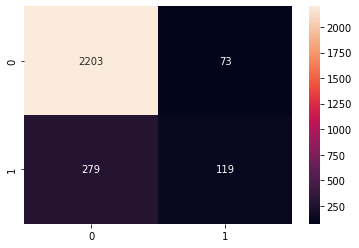

In [85]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')

In [86]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, Y_train)
# Predicting result
Y_pred = classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2276
           1       0.47      0.37      0.42       398

    accuracy                           0.84      2674
   macro avg       0.68      0.65      0.66      2674
weighted avg       0.83      0.84      0.84      2674



### Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, Y_train)
# Predicting result
Y_pred = classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2276
           1       0.00      0.00      0.00       398

    accuracy                           0.85      2674
   macro avg       0.43      0.50      0.46      2674
weighted avg       0.72      0.85      0.78      2674



/jupyter/.home/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/jupyter/.home/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/jupyter/.home/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM

In [88]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train, Y_train)
# Predicting result
Y_pred = classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2276
           1       0.77      0.25      0.38       398

    accuracy                           0.88      2674
   macro avg       0.83      0.62      0.66      2674
weighted avg       0.87      0.88      0.85      2674



conclusion: since the data is lack of balance, the model is not reliable

## With Balancing

#### 1. Oversample the smallest class

In [ ]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_train_balanced, Y_train_balanced = over_sampler.fit_resample(X_train, Y_train)
X_test_balanced, Y_test_balanced = over_sampler.fit_resample(X_test, Y_test)
print(f"Training target statistics: {Counter(Y_train_balanced)}")
print(f"Testing target statistics: {Counter(Y_test_balanced)}")

#### Applying Logistic Regression

In [173]:
# Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X_train_balanced, Y_train_balanced)

# Predicting result on test set
Y_pred = classifier.predict(X_test_balanced)

# Report on prediction
from sklearn.metrics import classification_report
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      2276
           1       0.80      0.85      0.82      2276

    accuracy                           0.82      4552
   macro avg       0.82      0.82      0.82      4552
weighted avg       0.82      0.82      0.82      4552



<AxesSubplot:>

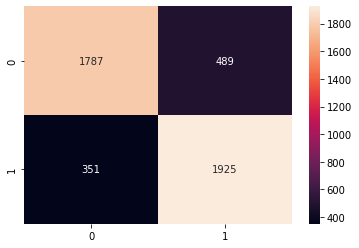

In [174]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test_balanced, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')

#### Applying RandomForest

In [175]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=3, random_state=0)

classifier.fit(X_train_balanced, Y_train_balanced)
# Predicting result
Y_pred = classifier.predict(X_test_balanced)
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      2276
           1       0.76      0.92      0.84      2276

    accuracy                           0.82      4552
   macro avg       0.83      0.82      0.82      4552
weighted avg       0.83      0.82      0.82      4552



<AxesSubplot:>

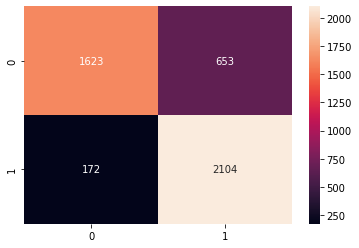

In [176]:
cm = confusion_matrix(Y_test_balanced, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')

#### Applying SVM

In [178]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train_balanced, Y_train_balanced)
# Predicting result
Y_pred = classifier.predict(X_test_balanced)
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81      2276
           1       0.79      0.87      0.83      2276

    accuracy                           0.82      4552
   macro avg       0.82      0.82      0.82      4552
weighted avg       0.82      0.82      0.82      4552



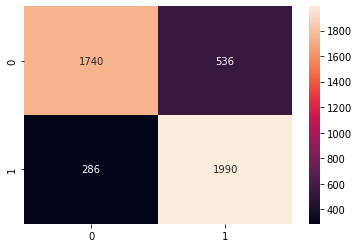

In [179]:
cm = confusion_matrix(Y_test_balanced, Y_pred)
ax = sns.heatmap(cm, annot=True,fmt='d')
#ax.figure.savefig('graph/SVM_confusion.png')

#### Applying Naive Bayes

In [180]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train_balanced, Y_train_balanced)
# Predicting result
Y_pred = classifier.predict(X_test_balanced)
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.43      0.58      2276
           1       0.62      0.92      0.74      2276

    accuracy                           0.68      4552
   macro avg       0.74      0.68      0.66      4552
weighted avg       0.74      0.68      0.66      4552



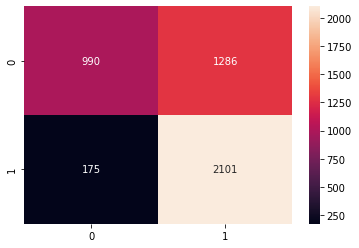

In [181]:
cm = confusion_matrix(Y_test_balanced, Y_pred)
ax = sns.heatmap(cm, annot=True,fmt='d')
#ax.figure.savefig('graph/NB_confusion.png')

#### 2. Undersample the larger class

In [182]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X2_train_balanced, Y2_train_balanced = under_sampler.fit_resample(X_train, Y_train)
X2_test_balanced, Y2_test_balanced = under_sampler.fit_resample(X_test, Y_test)

print(f"Training target statistics: {Counter(Y2_train_balanced)}")
print(f"Testing target statistics: {Counter(Y2_test_balanced)}")

Training target statistics: Counter({0: 930, 1: 930})
Testing target statistics: Counter({0: 398, 1: 398})


Logistic

In [183]:
# Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X2_train_balanced, Y2_train_balanced)

# Predicting result on test set
Y_pred = classifier.predict(X2_test_balanced)

# Report on prediction
from sklearn.metrics import classification_report
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       398
           1       0.80      0.77      0.79       398

    accuracy                           0.79       796
   macro avg       0.79      0.79      0.79       796
weighted avg       0.79      0.79      0.79       796



tree

In [184]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(X2_train_balanced, Y2_train_balanced)
# Predicting result
Y_pred = classifier.predict(X2_test_balanced)
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76       398
           1       0.77      0.72      0.74       398

    accuracy                           0.75       796
   macro avg       0.75      0.75      0.75       796
weighted avg       0.75      0.75      0.75       796



NB

In [185]:
classifier = GaussianNB()
classifier.fit(X2_train_balanced, Y2_train_balanced)
# Predicting result
Y_pred = classifier.predict(X2_test_balanced)
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.61      0.91      0.73       398
           1       0.82      0.41      0.54       398

    accuracy                           0.66       796
   macro avg       0.71      0.66      0.64       796
weighted avg       0.71      0.66      0.64       796



RF

In [186]:
classifier = RandomForestClassifier(max_depth=3, random_state=0)

classifier.fit(X2_train_balanced, Y2_train_balanced)
# Predicting result
Y_pred = classifier.predict(X2_test_balanced)
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77       398
           1       0.74      0.91      0.82       398

    accuracy                           0.80       796
   macro avg       0.81      0.80      0.79       796
weighted avg       0.81      0.80      0.79       796



SVM

In [187]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X2_train_balanced, Y2_train_balanced)
# Predicting result
Y_pred = classifier.predict(X2_test_balanced)
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.70      0.78       398
           1       0.75      0.90      0.82       398

    accuracy                           0.80       796
   macro avg       0.81      0.80      0.80       796
weighted avg       0.81      0.80      0.80       796



## X2_tree

### Split the training set and testing set

In [188]:
from sklearn.model_selection import train_test_split

In [89]:
# split the data in 70:30 for train:test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X2_tree, Y, test_size = 0.3, random_state = 2, stratify = Y)

## Without balancing

In [90]:
from collections import Counter
print(f"Training target statistics: {Counter(Y_train)}")
print(f"Testing target statistics: {Counter(Y_test)}")

Training target statistics: Counter({0: 5308, 1: 930})
Testing target statistics: Counter({0: 2276, 1: 398})


#### Applying Logistic Regression

In [91]:
# Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X_train, Y_train)

# Predicting result on test set
Y_pred = classifier.predict(X_test)

# Report on prediction
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2276
           1       0.43      0.06      0.10       398

    accuracy                           0.85      2674
   macro avg       0.65      0.52      0.51      2674
weighted avg       0.79      0.85      0.80      2674



<AxesSubplot:>

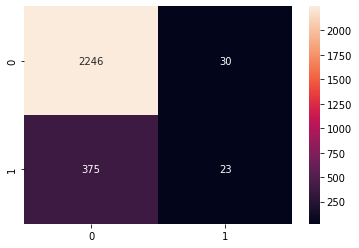

In [92]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')

In [93]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, Y_train)
# Predicting result
Y_pred = classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      2276
           1       0.32      0.29      0.30       398

    accuracy                           0.80      2674
   macro avg       0.60      0.59      0.59      2674
weighted avg       0.79      0.80      0.80      2674



### Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, Y_train)
# Predicting result
Y_pred = classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2276
           1       0.00      0.00      0.00       398

    accuracy                           0.85      2674
   macro avg       0.43      0.50      0.46      2674
weighted avg       0.72      0.85      0.78      2674



/jupyter/.home/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/jupyter/.home/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/jupyter/.home/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM

In [95]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train, Y_train)
# Predicting result
Y_pred = classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2276
           1       0.73      0.06      0.10       398

    accuracy                           0.86      2674
   macro avg       0.80      0.53      0.51      2674
weighted avg       0.84      0.86      0.80      2674



conclusion: since the data is lack of balance, the model is not reliable

## With Balancing

#### 1. Oversample the smallest class

In [196]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_train_balanced, Y_train_balanced = over_sampler.fit_resample(X_train, Y_train)
X_test_balanced, Y_test_balanced = over_sampler.fit_resample(X_test, Y_test)
print(f"Training target statistics: {Counter(Y_train_balanced)}")
print(f"Testing target statistics: {Counter(Y_test_balanced)}")

Training target statistics: Counter({0: 5308, 1: 5308})
Testing target statistics: Counter({1: 2276, 0: 2276})


#### Applying Logistic Regression

In [197]:
# Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X_train_balanced, Y_train_balanced)

# Predicting result on test set
Y_pred = classifier.predict(X_test_balanced)

# Report on prediction
from sklearn.metrics import classification_report
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73      2276
           1       0.72      0.82      0.77      2276

    accuracy                           0.75      4552
   macro avg       0.76      0.75      0.75      4552
weighted avg       0.76      0.75      0.75      4552



<AxesSubplot:>

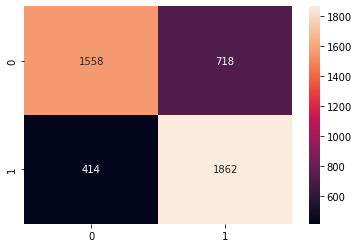

In [198]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test_balanced, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')

#### Applying RandomForest

In [199]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=3, random_state=0)

classifier.fit(X_train_balanced, Y_train_balanced)
# Predicting result
Y_pred = classifier.predict(X_test_balanced)
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.65      0.73      2276
           1       0.72      0.87      0.79      2276

    accuracy                           0.76      4552
   macro avg       0.78      0.76      0.76      4552
weighted avg       0.78      0.76      0.76      4552



<AxesSubplot:>

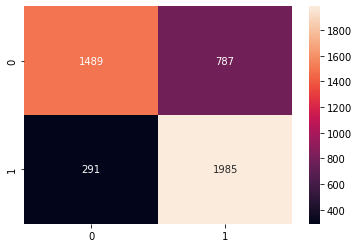

In [200]:
cm = confusion_matrix(Y_test_balanced, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')

#### Applying SVM

In [202]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train_balanced, Y_train_balanced)
# Predicting result
Y_pred = classifier.predict(X_test_balanced)
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.62      0.71      2276
           1       0.70      0.88      0.78      2276

    accuracy                           0.75      4552
   macro avg       0.77      0.75      0.75      4552
weighted avg       0.77      0.75      0.75      4552



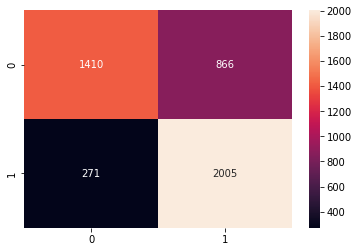

In [203]:
cm = confusion_matrix(Y_test_balanced, Y_pred)
ax = sns.heatmap(cm, annot=True,fmt='d')
#ax.figure.savefig('graph/SVM_confusion.png')

#### Applying Naive Bayes

In [204]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train_balanced, Y_train_balanced)
# Predicting result
Y_pred = classifier.predict(X_test_balanced)
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.62      0.82      0.70      2276
           1       0.73      0.49      0.58      2276

    accuracy                           0.65      4552
   macro avg       0.67      0.65      0.64      4552
weighted avg       0.67      0.65      0.64      4552



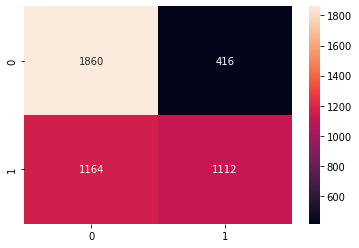

In [205]:
cm = confusion_matrix(Y_test_balanced, Y_pred)
ax = sns.heatmap(cm, annot=True,fmt='d')
#ax.figure.savefig('graph/NB_confusion.png')

#### 2. Undersample the larger class

In [206]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X2_train_balanced, Y2_train_balanced = under_sampler.fit_resample(X_train, Y_train)
X2_test_balanced, Y2_test_balanced = under_sampler.fit_resample(X_test, Y_test)

print(f"Training target statistics: {Counter(Y2_train_balanced)}")
print(f"Testing target statistics: {Counter(Y2_test_balanced)}")

Training target statistics: Counter({0: 930, 1: 930})
Testing target statistics: Counter({0: 398, 1: 398})


Logistic

In [207]:
# Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X2_train_balanced, Y2_train_balanced)

# Predicting result on test set
Y_pred = classifier.predict(X2_test_balanced)

# Report on prediction
from sklearn.metrics import classification_report
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70       398
           1       0.69      0.79      0.74       398

    accuracy                           0.72       796
   macro avg       0.72      0.72      0.72       796
weighted avg       0.72      0.72      0.72       796



tree

In [208]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(X2_train_balanced, Y2_train_balanced)
# Predicting result
Y_pred = classifier.predict(X2_test_balanced)
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.73      0.70      0.71       398
           1       0.71      0.75      0.73       398

    accuracy                           0.72       796
   macro avg       0.72      0.72      0.72       796
weighted avg       0.72      0.72      0.72       796



NB

In [209]:
classifier = GaussianNB()
classifier.fit(X2_train_balanced, Y2_train_balanced)
# Predicting result
Y_pred = classifier.predict(X2_test_balanced)
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.62      0.81      0.70       398
           1       0.73      0.52      0.60       398

    accuracy                           0.66       796
   macro avg       0.68      0.66      0.65       796
weighted avg       0.68      0.66      0.65       796



RF

In [210]:
classifier = RandomForestClassifier(max_depth=3, random_state=0)

classifier.fit(X2_train_balanced, Y2_train_balanced)
# Predicting result
Y_pred = classifier.predict(X2_test_balanced)
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.63      0.72       398
           1       0.70      0.87      0.78       398

    accuracy                           0.75       796
   macro avg       0.77      0.75      0.75       796
weighted avg       0.77      0.75      0.75       796



SVM

In [211]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X2_train_balanced, Y2_train_balanced)
# Predicting result
Y_pred = classifier.predict(X2_test_balanced)
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.60      0.69       398
           1       0.68      0.86      0.76       398

    accuracy                           0.73       796
   macro avg       0.74      0.73      0.72       796
weighted avg       0.74      0.73      0.72       796



# X3

X3_normalized\
X3_corela\
X3_tree\

*combine\

w/o balancing\
over sample\
under sample\

*combine\

LR\
NB\
RF\
SVM\

## X3_normalized

### Split the training set and testing set

In [283]:
from sklearn.model_selection import train_test_split

In [96]:
# split the data in 70:30 for train:test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X3_normalized, Y, test_size = 0.3, random_state = 2, stratify = Y)

## Without balancing

In [97]:
from collections import Counter
print(f"Training target statistics: {Counter(Y_train)}")
print(f"Testing target statistics: {Counter(Y_test)}")

Training target statistics: Counter({0: 5308, 1: 930})
Testing target statistics: Counter({0: 2276, 1: 398})


#### Applying Logistic Regression

In [98]:
# Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X_train, Y_train)

# Predicting result on test set
Y_pred = classifier.predict(X_test)

# Report on prediction
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.93      2276
           1       0.72      0.35      0.47       398

    accuracy                           0.88      2674
   macro avg       0.81      0.66      0.70      2674
weighted avg       0.87      0.88      0.86      2674



<AxesSubplot:>

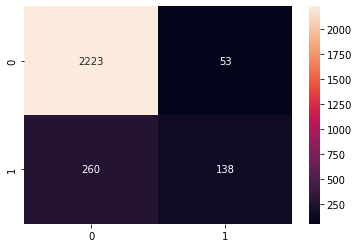

In [99]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')

In [100]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, Y_train)
# Predicting result
Y_pred = classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.18      0.31      2276
           1       0.18      0.99      0.30       398

    accuracy                           0.30      2674
   macro avg       0.58      0.59      0.30      2674
weighted avg       0.87      0.30      0.31      2674



### Random Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, Y_train)
# Predicting result
Y_pred = classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2276
           1       0.00      0.00      0.00       398

    accuracy                           0.85      2674
   macro avg       0.43      0.50      0.46      2674
weighted avg       0.72      0.85      0.78      2674



/jupyter/.home/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/jupyter/.home/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/jupyter/.home/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM

In [102]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train, Y_train)
# Predicting result
Y_pred = classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2276
           1       0.76      0.26      0.39       398

    accuracy                           0.88      2674
   macro avg       0.82      0.62      0.66      2674
weighted avg       0.87      0.88      0.85      2674



conclusion: since the data is lack of balance, the model is not reliable

## With Balancing

#### 1. Oversample the smallest class

In [291]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_train_balanced, Y_train_balanced = over_sampler.fit_resample(X_train, Y_train)
X_test_balanced, Y_test_balanced = over_sampler.fit_resample(X_test, Y_test)
print(f"Training target statistics: {Counter(Y_train_balanced)}")
print(f"Testing target statistics: {Counter(Y_test_balanced)}")

Training target statistics: Counter({0: 5308, 1: 5308})
Testing target statistics: Counter({1: 2276, 0: 2276})


#### Applying Logistic Regression

In [292]:
# Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X_train_balanced, Y_train_balanced)

# Predicting result on test set
Y_pred = classifier.predict(X_test_balanced)

# Report on prediction
from sklearn.metrics import classification_report
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      2276
           1       0.81      0.86      0.83      2276

    accuracy                           0.83      4552
   macro avg       0.83      0.83      0.83      4552
weighted avg       0.83      0.83      0.83      4552



<AxesSubplot:>

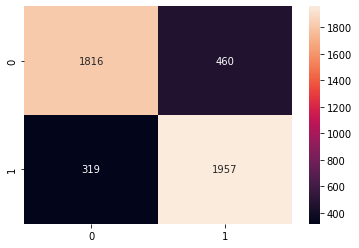

In [293]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test_balanced, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')

#### Applying RandomForest

In [294]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=3, random_state=0)

classifier.fit(X_train_balanced, Y_train_balanced)
# Predicting result
Y_pred = classifier.predict(X_test_balanced)
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78      2276
           1       0.80      0.72      0.76      2276

    accuracy                           0.77      4552
   macro avg       0.77      0.77      0.77      4552
weighted avg       0.77      0.77      0.77      4552



<AxesSubplot:>

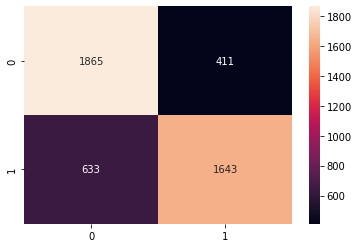

In [295]:
cm = confusion_matrix(Y_test_balanced, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')

#### Applying SVM

In [301]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train_balanced, Y_train_balanced)
# Predicting result
Y_pred = classifier.predict(X_test_balanced)
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      2276
           1       0.79      0.85      0.82      2276

    accuracy                           0.81      4552
   macro avg       0.81      0.81      0.81      4552
weighted avg       0.81      0.81      0.81      4552



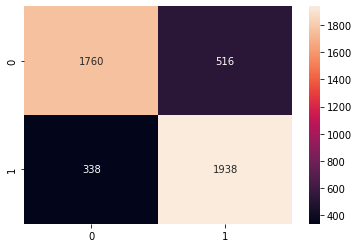

In [302]:
cm = confusion_matrix(Y_test_balanced, Y_pred)
ax = sns.heatmap(cm, annot=True,fmt='d')
#ax.figure.savefig('graph/SVM_confusion.png')

In [304]:
import pickle

with open('SVM_X3_nor_classifier.pkl', 'wb') as f:
    pickle.dump(classifier, f)

#### Applying Naive Bayes

In [299]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train_balanced, Y_train_balanced)
# Predicting result
Y_pred = classifier.predict(X_test_balanced)
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.21      0.34      2276
           1       0.55      0.99      0.71      2276

    accuracy                           0.60      4552
   macro avg       0.74      0.60      0.52      4552
weighted avg       0.74      0.60      0.52      4552



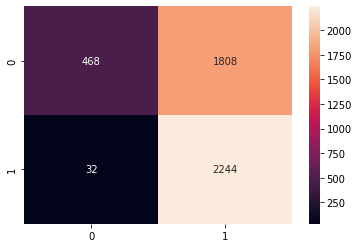

In [300]:
cm = confusion_matrix(Y_test_balanced, Y_pred)
ax = sns.heatmap(cm, annot=True,fmt='d')
#ax.figure.savefig('graph/NB_confusion.png')

#### 2. Undersample the larger class

In [229]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X2_train_balanced, Y2_train_balanced = under_sampler.fit_resample(X_train, Y_train)
X2_test_balanced, Y2_test_balanced = under_sampler.fit_resample(X_test, Y_test)

print(f"Training target statistics: {Counter(Y2_train_balanced)}")
print(f"Testing target statistics: {Counter(Y2_test_balanced)}")

Training target statistics: Counter({0: 930, 1: 930})
Testing target statistics: Counter({0: 398, 1: 398})


Logistic

In [230]:
# Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X2_train_balanced, Y2_train_balanced)

# Predicting result on test set
Y_pred = classifier.predict(X2_test_balanced)

# Report on prediction
from sklearn.metrics import classification_report
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       398
           1       0.80      0.83      0.81       398

    accuracy                           0.81       796
   macro avg       0.81      0.81      0.81       796
weighted avg       0.81      0.81      0.81       796



tree

In [231]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(X2_train_balanced, Y2_train_balanced)
# Predicting result
Y_pred = classifier.predict(X2_test_balanced)
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       398
           1       0.81      0.79      0.80       398

    accuracy                           0.80       796
   macro avg       0.80      0.80      0.80       796
weighted avg       0.80      0.80      0.80       796



NB

In [232]:
classifier = GaussianNB()
classifier.fit(X2_train_balanced, Y2_train_balanced)
# Predicting result
Y_pred = classifier.predict(X2_test_balanced)
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.57      0.94      0.71       398
           1       0.82      0.28      0.42       398

    accuracy                           0.61       796
   macro avg       0.69      0.61      0.56       796
weighted avg       0.69      0.61      0.56       796



RF

In [233]:
classifier = RandomForestClassifier(max_depth=3, random_state=0)

classifier.fit(X2_train_balanced, Y2_train_balanced)
# Predicting result
Y_pred = classifier.predict(X2_test_balanced)
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       398
           1       0.79      0.80      0.79       398

    accuracy                           0.79       796
   macro avg       0.79      0.79      0.79       796
weighted avg       0.79      0.79      0.79       796



SVM

In [234]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X2_train_balanced, Y2_train_balanced)
# Predicting result
Y_pred = classifier.predict(X2_test_balanced)
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.75      0.79       398
           1       0.77      0.86      0.82       398

    accuracy                           0.81       796
   macro avg       0.81      0.81      0.80       796
weighted avg       0.81      0.81      0.80       796



## X3_corela

### Split the training set and testing set

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# split the data in 70:30 for train:test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X3_corela, Y, test_size = 0.3, random_state = 2, stratify = Y)

## Without balancing

In [37]:
from collections import Counter
print(f"Training target statistics: {Counter(Y_train)}")
print(f"Testing target statistics: {Counter(Y_test)}")

Training target statistics: Counter({0: 5308, 1: 930})
Testing target statistics: Counter({0: 2276, 1: 398})


#### Applying Logistic Regression

In [38]:
# Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X_train, Y_train)

# Predicting result on test set
Y_pred = classifier.predict(X_test)

# Report on prediction
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2276
           1       0.61      0.30      0.41       398

    accuracy                           0.87      2674
   macro avg       0.75      0.64      0.67      2674
weighted avg       0.85      0.87      0.85      2674



<AxesSubplot:>

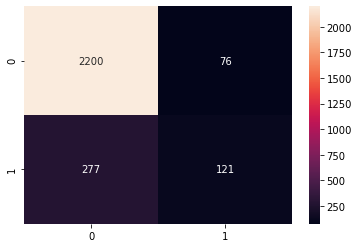

In [39]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')

In [40]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, Y_train)
# Predicting result
Y_pred = classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.16      0.28      2276
           1       0.17      1.00      0.29       398

    accuracy                           0.29      2674
   macro avg       0.58      0.58      0.29      2674
weighted avg       0.87      0.29      0.28      2674



### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, Y_train)
# Predicting result
Y_pred = classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2276
           1       0.00      0.00      0.00       398

    accuracy                           0.85      2674
   macro avg       0.43      0.50      0.46      2674
weighted avg       0.72      0.85      0.78      2674



D:\tools\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\tools\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\tools\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM

In [42]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train, Y_train)
# Predicting result
Y_pred = classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2276
           1       0.80      0.24      0.36       398

    accuracy                           0.88      2674
   macro avg       0.84      0.61      0.65      2674
weighted avg       0.87      0.88      0.85      2674



conclusion: since the data is lack of balance, the model is not reliable

## With Balancing

#### 1. Oversample the smallest class

In [43]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_train_balanced, Y_train_balanced = over_sampler.fit_resample(X_train, Y_train)
X_test_balanced, Y_test_balanced = over_sampler.fit_resample(X_test, Y_test)
print(f"Training target statistics: {Counter(Y_train_balanced)}")
print(f"Testing target statistics: {Counter(Y_test_balanced)}")

Training target statistics: Counter({0: 5308, 1: 5308})
Testing target statistics: Counter({1: 2276, 0: 2276})


#### Applying Logistic Regression

In [44]:
# Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X_train_balanced, Y_train_balanced)

# Predicting result on test set
Y_pred = classifier.predict(X_test_balanced)

# Report on prediction
from sklearn.metrics import classification_report
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2276
           1       0.80      0.80      0.80      2276

    accuracy                           0.80      4552
   macro avg       0.80      0.80      0.80      4552
weighted avg       0.80      0.80      0.80      4552



<AxesSubplot:>

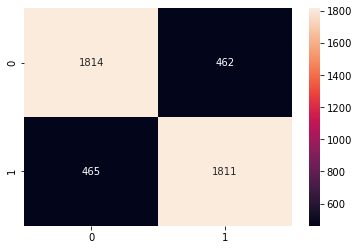

In [45]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test_balanced, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')

#### Applying RandomForest

In [60]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=3, random_state=0)

classifier.fit(X_train_balanced, Y_train_balanced)
# Predicting result
Y_pred = classifier.predict(X_test_balanced)
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.68      0.77      2276
           1       0.74      0.92      0.82      2276

    accuracy                           0.80      4552
   macro avg       0.82      0.80      0.80      4552
weighted avg       0.82      0.80      0.80      4552



<AxesSubplot:>

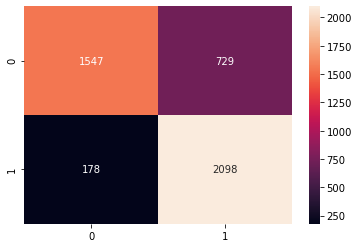

In [61]:
cm = confusion_matrix(Y_test_balanced, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')

In [62]:
import pickle

with open('X3_core_RF_classifier.pkl', 'wb') as f:
    pickle.dump(classifier, f)

#### Applying SVM

In [49]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train_balanced, Y_train_balanced)
# Predicting result
Y_pred = classifier.predict(X_test_balanced)
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.74      0.79      2276
           1       0.77      0.88      0.82      2276

    accuracy                           0.81      4552
   macro avg       0.81      0.81      0.81      4552
weighted avg       0.81      0.81      0.81      4552



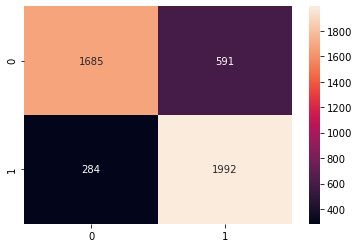

In [50]:
cm = confusion_matrix(Y_test_balanced, Y_pred)
ax = sns.heatmap(cm, annot=True,fmt='d')
#ax.figure.savefig('graph/SVM_confusion.png')

#### Applying Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train_balanced, Y_train_balanced)
# Predicting result
Y_pred = classifier.predict(X_test_balanced)
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.16      0.28      2276
           1       0.54      1.00      0.70      2276

    accuracy                           0.58      4552
   macro avg       0.76      0.58      0.49      4552
weighted avg       0.76      0.58      0.49      4552



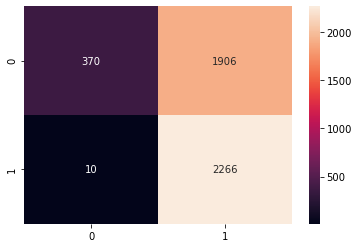

In [52]:
cm = confusion_matrix(Y_test_balanced, Y_pred)
ax = sns.heatmap(cm, annot=True,fmt='d')
#ax.figure.savefig('graph/NB_confusion.png')

#### 2. Undersample the larger class

In [53]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X2_train_balanced, Y2_train_balanced = under_sampler.fit_resample(X_train, Y_train)
X2_test_balanced, Y2_test_balanced = under_sampler.fit_resample(X_test, Y_test)

print(f"Training target statistics: {Counter(Y2_train_balanced)}")
print(f"Testing target statistics: {Counter(Y2_test_balanced)}")

Training target statistics: Counter({0: 930, 1: 930})
Testing target statistics: Counter({0: 398, 1: 398})


Logistic

In [54]:
# Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X2_train_balanced, Y2_train_balanced)

# Predicting result on test set
Y_pred = classifier.predict(X2_test_balanced)

# Report on prediction
from sklearn.metrics import classification_report
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       398
           1       0.80      0.77      0.78       398

    accuracy                           0.79       796
   macro avg       0.79      0.79      0.79       796
weighted avg       0.79      0.79      0.79       796



tree

classifier = tree.DecisionTreeClassifier()
classifier.fit(X2_train_balanced, Y2_train_balanced)
#Predicting result
Y_pred = classifier.predict(X2_test_balanced)
print(classification_report(Y2_test_balanced, Y_pred))

NB

In [56]:
classifier = GaussianNB()
classifier.fit(X2_train_balanced, Y2_train_balanced)
# Predicting result
Y_pred = classifier.predict(X2_test_balanced)
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.14      0.25       398
           1       0.54      1.00      0.70       398

    accuracy                           0.57       796
   macro avg       0.76      0.57      0.47       796
weighted avg       0.76      0.57      0.47       796



RF

In [57]:
classifier = RandomForestClassifier(max_depth=3, random_state=0)

classifier.fit(X2_train_balanced, Y2_train_balanced)
# Predicting result
Y_pred = classifier.predict(X2_test_balanced)
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76       398
           1       0.73      0.89      0.80       398

    accuracy                           0.78       796
   macro avg       0.80      0.78      0.78       796
weighted avg       0.80      0.78      0.78       796



SVM

In [58]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X2_train_balanced, Y2_train_balanced)
# Predicting result
Y_pred = classifier.predict(X2_test_balanced)
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.72      0.78       398
           1       0.76      0.86      0.81       398

    accuracy                           0.79       796
   macro avg       0.80      0.79      0.79       796
weighted avg       0.80      0.79      0.79       796



## X3_tree

### Split the training set and testing set

In [321]:
from sklearn.model_selection import train_test_split

In [106]:
# split the data in 70:30 for train:test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X3_tree, Y, test_size = 0.3, random_state = 2, stratify = Y)

## Without balancing

In [107]:
from collections import Counter
print(f"Training target statistics: {Counter(Y_train)}")
print(f"Testing target statistics: {Counter(Y_test)}")

Training target statistics: Counter({0: 5308, 1: 930})
Testing target statistics: Counter({0: 2276, 1: 398})


#### Applying Logistic Regression

In [324]:
# Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X_train, Y_train)

# Predicting result on test set
Y_pred = classifier.predict(X_test)

# Report on prediction
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93      2276
           1       0.64      0.26      0.37       398

    accuracy                           0.87      2674
   macro avg       0.76      0.62      0.65      2674
weighted avg       0.85      0.87      0.84      2674



<AxesSubplot:>

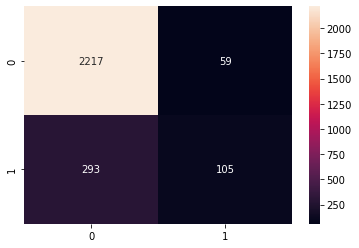

In [325]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')

In [326]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, Y_train)
# Predicting result
Y_pred = classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2276
           1       0.51      0.32      0.39       398

    accuracy                           0.85      2674
   macro avg       0.70      0.63      0.65      2674
weighted avg       0.83      0.85      0.84      2674



### Random Forest

In [327]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, Y_train)
# Predicting result
Y_pred = classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2276
           1       0.00      0.00      0.00       398

    accuracy                           0.85      2674
   macro avg       0.43      0.50      0.46      2674
weighted avg       0.72      0.85      0.78      2674



/jupyter/.home/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/jupyter/.home/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/jupyter/.home/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM

In [108]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train, Y_train)
# Predicting result
Y_pred = classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2276
           1       0.78      0.25      0.38       398

    accuracy                           0.88      2674
   macro avg       0.83      0.62      0.66      2674
weighted avg       0.87      0.88      0.85      2674



conclusion: since the data is lack of balance, the model is not reliable

## With Balancing

#### 1. Oversample the smallest class

In [329]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_train_balanced, Y_train_balanced = over_sampler.fit_resample(X_train, Y_train)
X_test_balanced, Y_test_balanced = over_sampler.fit_resample(X_test, Y_test)
print(f"Training target statistics: {Counter(Y_train_balanced)}")
print(f"Testing target statistics: {Counter(Y_test_balanced)}")

Training target statistics: Counter({0: 5308, 1: 5308})
Testing target statistics: Counter({1: 2276, 0: 2276})


#### Applying Logistic Regression

In [330]:
# Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X_train_balanced, Y_train_balanced)

# Predicting result on test set
Y_pred = classifier.predict(X_test_balanced)

# Report on prediction
from sklearn.metrics import classification_report
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.78      2276
           1       0.76      0.83      0.80      2276

    accuracy                           0.79      4552
   macro avg       0.79      0.79      0.79      4552
weighted avg       0.79      0.79      0.79      4552



<AxesSubplot:>

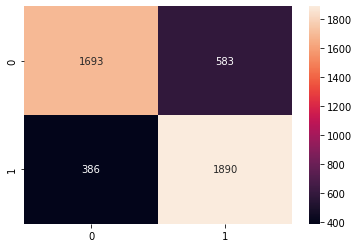

In [331]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test_balanced, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')

#### Applying RandomForest

In [347]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=3, random_state=0)

classifier.fit(X_train_balanced, Y_train_balanced)
# Predicting result
Y_pred = classifier.predict(X_test_balanced)
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.70      0.77      2276
           1       0.75      0.89      0.81      2276

    accuracy                           0.80      4552
   macro avg       0.81      0.80      0.79      4552
weighted avg       0.81      0.80      0.79      4552



<AxesSubplot:>

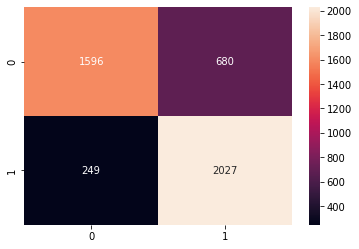

In [333]:
cm = confusion_matrix(Y_test_balanced, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')

#### Applying SVM

In [335]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train_balanced, Y_train_balanced)
# Predicting result
Y_pred = classifier.predict(X_test_balanced)
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78      2276
           1       0.76      0.84      0.80      2276

    accuracy                           0.79      4552
   macro avg       0.79      0.79      0.79      4552
weighted avg       0.79      0.79      0.79      4552



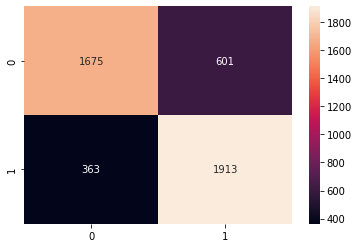

In [336]:
cm = confusion_matrix(Y_test_balanced, Y_pred)
ax = sns.heatmap(cm, annot=True,fmt='d')
#ax.figure.savefig('graph/SVM_confusion.png')

#### Applying Naive Bayes

In [337]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train_balanced, Y_train_balanced)
# Predicting result
Y_pred = classifier.predict(X_test_balanced)
print(classification_report(Y_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.58      0.94      0.72      2276
           1       0.85      0.32      0.47      2276

    accuracy                           0.63      4552
   macro avg       0.72      0.63      0.59      4552
weighted avg       0.72      0.63      0.59      4552



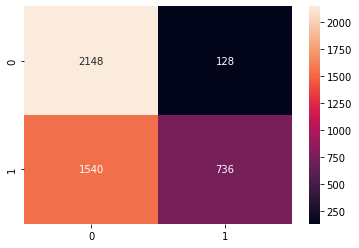

In [338]:
cm = confusion_matrix(Y_test_balanced, Y_pred)
ax = sns.heatmap(cm, annot=True,fmt='d')
#ax.figure.savefig('graph/NB_confusion.png')

#### 2. Undersample the larger class

In [339]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X2_train_balanced, Y2_train_balanced = under_sampler.fit_resample(X_train, Y_train)
X2_test_balanced, Y2_test_balanced = under_sampler.fit_resample(X_test, Y_test)

print(f"Training target statistics: {Counter(Y2_train_balanced)}")
print(f"Testing target statistics: {Counter(Y2_test_balanced)}")

Training target statistics: Counter({0: 930, 1: 930})
Testing target statistics: Counter({0: 398, 1: 398})


Logistic

In [340]:
# Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X2_train_balanced, Y2_train_balanced)

# Predicting result on test set
Y_pred = classifier.predict(X2_test_balanced)

# Report on prediction
from sklearn.metrics import classification_report
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       398
           1       0.76      0.79      0.77       398

    accuracy                           0.77       796
   macro avg       0.77      0.77      0.77       796
weighted avg       0.77      0.77      0.77       796



tree

In [341]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(X2_train_balanced, Y2_train_balanced)
# Predicting result
Y_pred = classifier.predict(X2_test_balanced)
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       398
           1       0.76      0.78      0.77       398

    accuracy                           0.76       796
   macro avg       0.76      0.76      0.76       796
weighted avg       0.76      0.76      0.76       796



NB

In [342]:
classifier = GaussianNB()
classifier.fit(X2_train_balanced, Y2_train_balanced)
# Predicting result
Y_pred = classifier.predict(X2_test_balanced)
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.58      0.93      0.71       398
           1       0.82      0.32      0.46       398

    accuracy                           0.63       796
   macro avg       0.70      0.63      0.59       796
weighted avg       0.70      0.63      0.59       796



RF

In [343]:
classifier = RandomForestClassifier(max_depth=3, random_state=0)

classifier.fit(X2_train_balanced, Y2_train_balanced)
# Predicting result
Y_pred = classifier.predict(X2_test_balanced)
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75       398
           1       0.73      0.89      0.80       398

    accuracy                           0.78       796
   macro avg       0.79      0.78      0.77       796
weighted avg       0.79      0.78      0.77       796



SVM

In [344]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X2_train_balanced, Y2_train_balanced)
# Predicting result
Y_pred = classifier.predict(X2_test_balanced)
print(classification_report(Y2_test_balanced, Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.65      0.73       398
           1       0.71      0.87      0.78       398

    accuracy                           0.76       796
   macro avg       0.77      0.76      0.75       796
weighted avg       0.77      0.76      0.75       796

